# UNIVARIADO
## df_291

Este es el notebook donde hago todo los modelos necesarios para mi tercera serie.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, BatchNormalization, Dropout, LSTM, TimeDistributed, Reshape
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

In [2]:
df1 = pd.read_csv("univariate/Hourly-train.csv")
df1

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V952,V953,V954,V955,V956,V957,V958,V959,V960,V961
0,H1,605.0,586.0,586.0,559.0,511.0,443.0,422.0,395.0,382.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,H2,3124.0,2990.0,2862.0,2809.0,2544.0,2201.0,1996.0,1861.0,1735.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,H3,1828.0,1806.0,1897.0,1750.0,1679.0,1620.0,1463.0,1342.0,1192.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,H4,6454.0,6324.0,6075.0,5949.0,5858.0,5579.0,5163.0,4790.0,4478.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,H5,4263.0,4297.0,4236.0,4080.0,3883.0,3672.0,3248.0,2841.0,2513.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,H410,153.0,196.0,163.0,131.0,82.0,53.0,57.0,54.0,46.0,...,132.0,165.0,191.0,186.0,119.0,108.0,70.0,72.0,79.0,77.0
410,H411,24.0,30.0,22.0,14.0,19.0,20.0,24.0,45.0,38.0,...,122.0,195.0,166.0,154.0,132.0,76.0,66.0,67.0,51.0,42.0
411,H412,19.0,30.0,12.0,16.0,13.0,15.0,15.0,21.0,21.0,...,111.0,166.0,225.0,278.0,144.0,71.0,70.0,73.0,39.0,36.0
412,H413,21.0,16.0,17.0,19.0,16.0,22.0,21.0,15.0,23.0,...,77.0,91.0,76.0,68.0,68.0,59.0,58.0,53.0,38.0,46.0


In [3]:
df1.set_index(df1.columns[0], inplace=True)

# Transponer el DataFrame
df_t = df1.T

df_t

V1,H1,H2,H3,H4,H5,H6,H7,H8,H9,H10,...,H405,H406,H407,H408,H409,H410,H411,H412,H413,H414
V2,605.0,3124.0,1828.0,6454.0,4263.0,5780.0,52817.0,32479.0,39455.0,513.0,...,68.0,21.0,214.0,19.0,31.0,153.0,24.0,19.0,21.0,15.0
V3,586.0,2990.0,1806.0,6324.0,4297.0,5497.0,51773.0,31018.0,38279.0,512.0,...,48.0,15.0,238.0,31.0,39.0,196.0,30.0,30.0,16.0,13.0
V4,586.0,2862.0,1897.0,6075.0,4236.0,5306.0,50907.0,30033.0,36944.0,506.0,...,33.0,15.0,130.0,25.0,22.0,163.0,22.0,12.0,17.0,13.0
V5,559.0,2809.0,1750.0,5949.0,4080.0,5178.0,50224.0,27716.0,35984.0,500.0,...,21.0,17.0,69.0,23.0,17.0,131.0,14.0,16.0,19.0,16.0
V6,511.0,2544.0,1679.0,5858.0,3883.0,5235.0,49496.0,25067.0,33721.0,490.0,...,30.0,15.0,68.0,14.0,13.0,82.0,19.0,13.0,16.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,138.0,80.0,423.0,257.0,69.0,108.0,76.0,71.0,59.0,48.0
V958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,116.0,71.0,290.0,194.0,53.0,70.0,66.0,70.0,58.0,41.0
V959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,93.0,74.0,264.0,110.0,50.0,72.0,67.0,73.0,53.0,35.0
V960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,74.0,41.0,194.0,81.0,54.0,79.0,51.0,39.0,38.0,26.0


In [5]:
df_t["H291"]

V2      12.2
V3      11.7
V4      11.1
V5      10.7
V6      10.3
        ... 
V957    23.1
V958    21.2
V959    20.1
V960    19.1
V961    18.3
Name: H291, Length: 960, dtype: float64

In [6]:
df2 = pd.read_csv("univariate/m4_info.csv")
df2.head(2)

,M4id,category,Frequency,Horizon,SP,StartingDate
0,Y1,Macro,1,6,Yearly,01-01-79 12:00
1,Y2,Macro,1,6,Yearly,01-01-79 12:00


In [7]:
mine = ['H309', 'H291', 'H143', 'H366', 'H174']

filtered_df = df2[df2['M4id'].isin(mine)]

print(filtered_df)

       M4id category  Frequency  Horizon      SP    StartingDate
99728  H143    Other         24       48  Hourly   06-10-13 3:00
99759  H174    Other         24       48  Hourly  17-05-10 12:00
99876  H291    Other         24       48  Hourly  02-06-10 12:00
99894  H309    Other         24       48  Hourly  10-05-10 12:00
99951  H366    Other         24       48  Hourly  01-01-17 12:00


# H291

In [8]:

# Definir la fecha de inicio
start_date = pd.to_datetime("02-06-10 12:00", format="%d-%m-%y %H:%M")

# Crear un rango de fechas con una hora de diferencia para cada fila de H143
index = pd.date_range(start=start_date, periods=len(df_t["H291"]), freq="H")

# Asignar el nuevo índice de tiempo a la serie
df_h291 = df_t["H291"].copy()
df_h291.index = index

df_h291 = pd.DataFrame({"time": index, "y": df_t["H291"].values})
df_h291 = df_h291.dropna(subset=['y'])

df_h291


/var/folders/vj/k67r6tzn6k3gd90ph1hz0kbr0000gn/T/ipykernel_36532/2150458733.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  index = pd.date_range(start=start_date, periods=len(df_t["H291"]), freq="H")


,time,y
0,2010-06-02 12:00:00,12.2
1,2010-06-02 13:00:00,11.7
2,2010-06-02 14:00:00,11.1
3,2010-06-02 15:00:00,10.7
4,2010-06-02 16:00:00,10.3
...,...,...
955,2010-07-12 07:00:00,23.1
956,2010-07-12 08:00:00,21.2
957,2010-07-12 09:00:00,20.1
958,2010-07-12 10:00:00,19.1


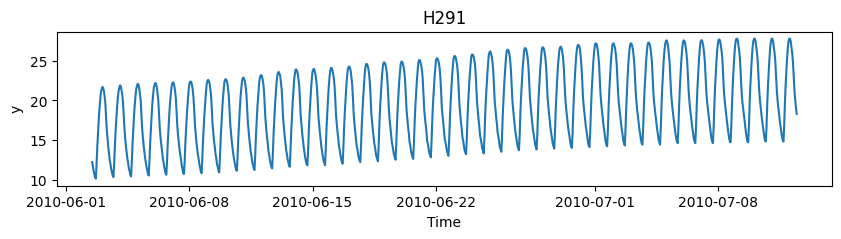

In [9]:
df_h291['time'] = pd.to_datetime(df_h291['time'])

plt.figure(figsize=(10, 2))

plt.plot(df_h291['time'], df_h291['y'], label='H291')
plt.xlabel('Time')
plt.ylabel('y')
plt.title('H291')

plt.show()


In [10]:
# Aplicar la prueba de Dickey-Fuller
result = adfuller(df_h291["y"])

# Mostrar los resultados
print("Resultados de la Prueba de Dickey-Fuller Aumentada:")
print(f"Estadístico ADF: {result[0]}")
print(f"Valor p: {result[1]}")
print(f"Número de retardos usados: {result[2]}")
print(f"Número de observaciones: {result[3]}")
print("Valores críticos:")
for key, value in result[4].items():
    print(f"  {key}: {value}")

# Interpretación del resultado
alpha = 0.05  # Nivel de significancia del 5%
if result[1] < alpha:
    print("\nConclusión: La serie es estacionaria (se rechaza la hipótesis nula).")
else:
    print("\nConclusión: La serie NO es estacionaria (no se puede rechazar la hipótesis nula).")


Resultados de la Prueba de Dickey-Fuller Aumentada:
Estadístico ADF: -3.6295268959485147
Valor p: 0.0052209895363950366
Número de retardos usados: 22
Número de observaciones: 937
Valores críticos:
  1%: -3.4373481911362997
  5%: -2.864629502968925
  10%: -2.56841503507527

Conclusión: La serie es estacionaria (se rechaza la hipótesis nula).


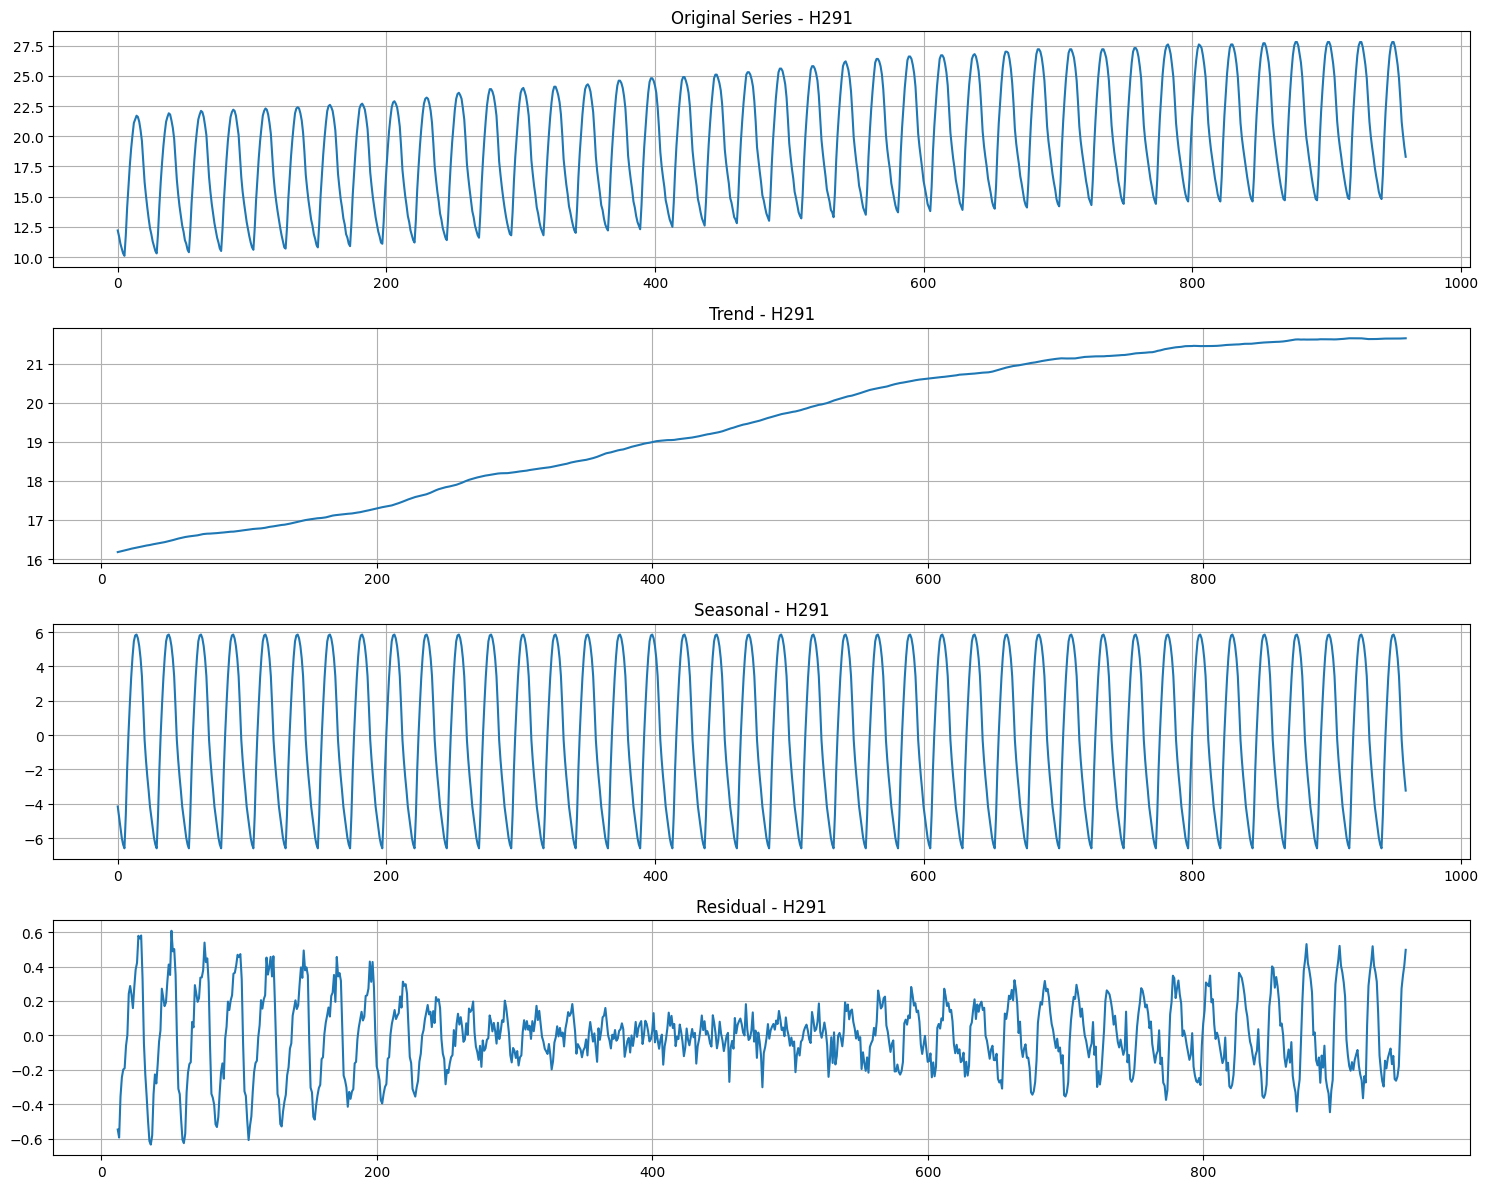

In [11]:
def plot_decomposition(series, series_name, period=24): #24 por que son por hora
    decomposition = seasonal_decompose(series, model='additive', period=period)

    # Crear subgráficos
    fig, axes = plt.subplots(4, 1, figsize=(15, 12))

    titles = ["Original Series", "Trend", "Seasonal", "Residual"]
    components = [decomposition.observed, decomposition.trend, decomposition.seasonal, decomposition.resid]

    for ax, title, comp in zip(axes, titles, components):
        ax.plot(comp)
        ax.set_title(f"{title} - {series_name}")
        ax.grid(True)

    plt.tight_layout()
    plt.show()

# Aplicar la descomposición estacional
plot_decomposition(df_h291["y"], "H291")


El test de dickey fuller me dijo que esta ya era estacionaria. También se puede observar que aunque si tiene una pendiente, no es tan pronunciada. La estacionalidad es fuerte y constante a lo largo de la serie. El residuio parece ser ruido blanco aleatorio. No será necesario transformarla. Sucede algo muy parecdia con la anterior.


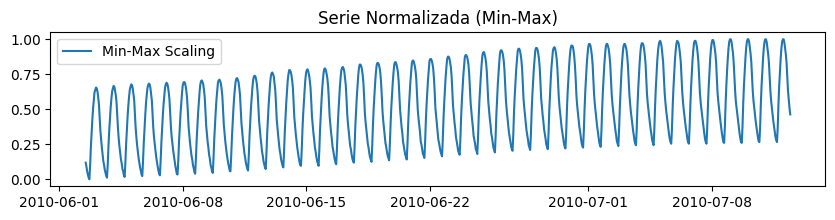

In [12]:
#normalizar los datos para las redes
scaler_minmax = MinMaxScaler()
df_h291['y_scaled'] = scaler_minmax.fit_transform(df_h291[['y']])

plt.figure(figsize=(10, 2))
plt.plot(df_h291['time'], df_h291['y_scaled'], label="Min-Max Scaling")
plt.title("Serie Normalizada (Min-Max)")
plt.legend()

## División


In [13]:
# Definir los tamaños de los conjuntos (por ejemplo, 70% para entrenamiento, 15% para validación y 15% para prueba)
train_size = int(len(df_h291) * 0.7)
val_size = int(len(df_h291) * 0.15)
test_size = len(df_h291) - train_size - val_size

# Dividir la serie en entrenamiento, validación y prueba
train, val, test = df_h291[:train_size], df_h291[train_size:train_size+val_size], df_h291[train_size+val_size:]

# Verificar la división
print(f"Entrenamiento: {len(train)} | Validación: {len(val)} | Prueba: {len(test)}")


Entrenamiento: 672 | Validación: 144 | Prueba: 144


In [14]:
test["time"] = pd.to_datetime(test["time"])  

last_date = test["time"].iloc[-1]  # Última fecha en el conjunto de prueba
print(f"Última fecha de la prueba: {last_date}")


horizon = 48

#fechas de predicción a partir de la última fecha del conjunto de prueba
prediction_dates = pd.date_range(start=last_date, periods=horizon + 1, freq='H')[1:]

print("Fechas de predicción:")
print(prediction_dates)
print(len(prediction_dates))


Última fecha de la prueba: 2010-07-12 11:00:00
Fechas de predicción:
DatetimeIndex(['2010-07-12 12:00:00', '2010-07-12 13:00:00',
               '2010-07-12 14:00:00', '2010-07-12 15:00:00',
               '2010-07-12 16:00:00', '2010-07-12 17:00:00',
               '2010-07-12 18:00:00', '2010-07-12 19:00:00',
               '2010-07-12 20:00:00', '2010-07-12 21:00:00',
               '2010-07-12 22:00:00', '2010-07-12 23:00:00',
               '2010-07-13 00:00:00', '2010-07-13 01:00:00',
               '2010-07-13 02:00:00', '2010-07-13 03:00:00',
               '2010-07-13 04:00:00', '2010-07-13 05:00:00',
               '2010-07-13 06:00:00', '2010-07-13 07:00:00',
               '2010-07-13 08:00:00', '2010-07-13 09:00:00',
               '2010-07-13 10:00:00', '2010-07-13 11:00:00',
               '2010-07-13 12:00:00', '2010-07-13 13:00:00',
               '2010-07-13 14:00:00', '2010-07-13 15:00:00',
               '2010-07-13 16:00:00', '2010-07-13 17:00:00',
               '

/var/folders/vj/k67r6tzn6k3gd90ph1hz0kbr0000gn/T/ipykernel_36532/2284990760.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["time"] = pd.to_datetime(test["time"])
/var/folders/vj/k67r6tzn6k3gd90ph1hz0kbr0000gn/T/ipykernel_36532/2284990760.py:10: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  prediction_dates = pd.date_range(start=last_date, periods=horizon + 1, freq='H')[1:]


El horizonte para esta serie es 48, como todas las que me tocaron

# Creación de modelos

In [16]:
def split_univariate_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)


n_steps = 48  # Horizonte de predicción
n_features = 1


In [17]:
# Aplicar la función de división
X_train, y_train = split_univariate_sequence(train['y_scaled'].values, n_steps)
X_val, y_val = split_univariate_sequence(val['y_scaled'].values, n_steps)
X_test, y_test = split_univariate_sequence(test['y_scaled'].values, n_steps)


In [18]:
# Ajustar la forma para CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], n_features))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))

### CNN 1

In [19]:
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_steps, n_features)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')


history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=1)

loss = model.evaluate(X_test, y_test)
print(f'Error cuadrático medio en prueba: {loss}')

Epoch 1/50


/Users/maripau/Desktop/ITESO/No lineales/EXAMEN2/examen2_venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1094 - val_loss: 0.0126
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0056 - val_loss: 0.0028
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.3328e-04 - val_loss: 9.1911e-04
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8339e-04 - val_loss: 5.7993e-04
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7062e-04 - val_loss: 4.0803e-04
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0646e-04 - val_loss: 3.4027e-04
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3739e-04 - val_loss: 2.5184e-04
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1222e-04 - val_loss: 2.8055e-04
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.3865e-05 - val_loss: 2.5177e-04
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.9106e-05 - val_loss: 1.8264e-04
Epoch 12/50
20/20 ━━━

<Axes: >

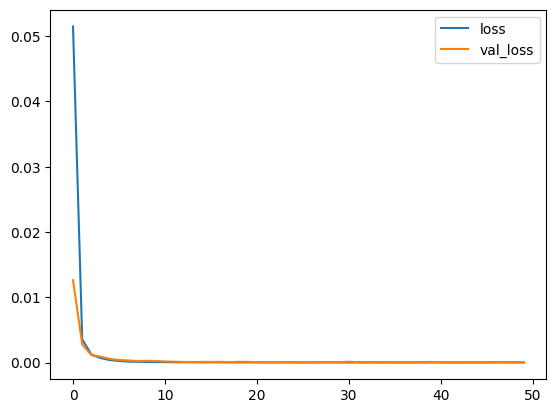

In [20]:
pd.DataFrame(history.history).plot()

In [21]:
scaler = MinMaxScaler()
scaler.fit(y_train.reshape(-1, 1))  

MinMaxScaler()

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


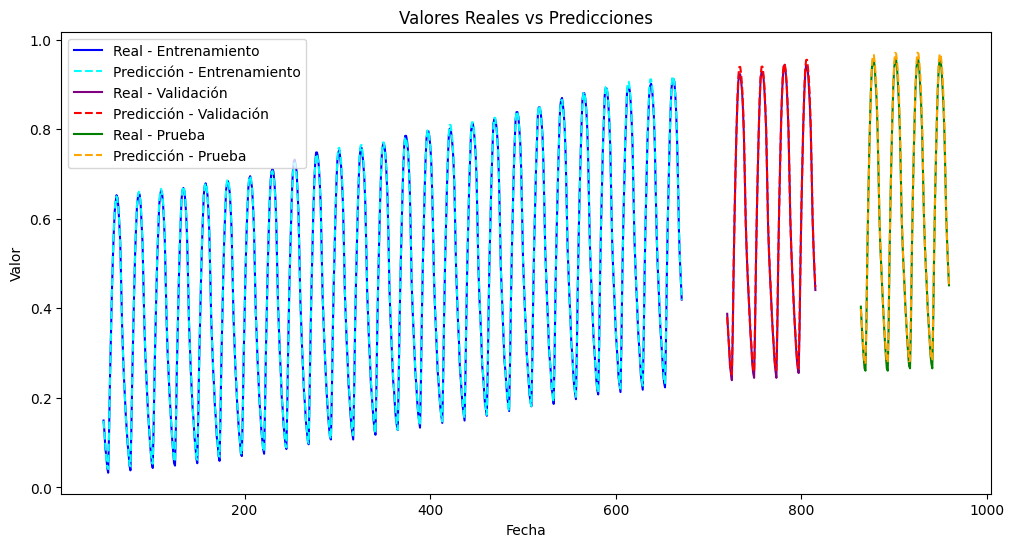

In [22]:

# Predicciones entrenamiento, validación y prueba
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)  
y_test_pred = model.predict(X_test)

#quitar normalizacion
y_train_pred_inv = scaler.inverse_transform(y_train_pred)
y_val_pred_inv = scaler.inverse_transform(y_val_pred)  
y_test_pred_inv = scaler.inverse_transform(y_test_pred)

#  valores reales vs. predichos 
plt.figure(figsize=(12, 6))

# inverse_transform
y_train_reshaped = y_train.reshape(-1, 1)  
plt.plot(train.index[n_steps:], scaler.inverse_transform(y_train_reshaped), label='Real - Entrenamiento', color='blue')
plt.plot(train.index[n_steps:], y_train_pred_inv, label='Predicción - Entrenamiento', color='cyan', linestyle='dashed')

# validación
y_val_reshaped = y_val.reshape(-1, 1)  
plt.plot(val.index[n_steps:], scaler.inverse_transform(y_val_reshaped), label='Real - Validación', color='purple')
plt.plot(val.index[n_steps:], y_val_pred_inv, label='Predicción - Validación', color='red', linestyle='dashed')

# prueba
y_test_reshaped = y_test.reshape(-1, 1)  
plt.plot(test.index[n_steps:], scaler.inverse_transform(y_test_reshaped), label='Real - Prueba', color='green')
plt.plot(test.index[n_steps:], y_test_pred_inv, label='Predicción - Prueba', color='orange', linestyle='dashed')

plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Valores Reales vs Predicciones')
plt.legend()
plt.show()


In [23]:
mae = mean_absolute_error(y_test_reshaped, y_test_pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_reshaped, y_test_pred_inv))
r2 = r2_score(y_test_reshaped, y_test_pred_inv)
mape = np.mean(np.abs((y_test_reshaped - y_test_pred_inv) / y_test_reshaped)) * 100


print(f"Evaluación del Modelo en Test:")
print(f"MAE : {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R2 : {r2:.4f}")



Evaluación del Modelo en Test:
MAE : 0.0200
RMSE: 0.0225
R2 : 0.9924


In [24]:
print(f"Esta primera CNN tiene una primera capa para regresión en series de tiempo. "
      "Usa convoluciones para extraer los patrones.\n"
      "Apliqué unas capas de pooling para reducir las dimensiones y mejorar la eficiencia. "
      "Tiene al final una capa densa para hacer la predicción final.\n"
      "Le puse 50 épocas para iniciar y que midiera el MSE.\n")

print(f"Al evaluarlo con test, el MAE es de {mae:.4f}. Esto significa que en promedio el modelo se equivoca por esa cantidad.\n"
      f"El RMSE es {rmse:.4f}, lo que indica que mi modelo tiene buenas predicciones y que las predicciones no se desvían mucho de los valores reales.\n"
      f"En R² obtuve {r2:.4f}, lo que me dice que mi modelo explica bien la variabilidad de los datos.\n")

print("Lo que podría hacer para mejorarlo es experimentar con más filtros en la capa convolucional y tal vez aumentar las épocas para ver si consigo mejores resultados.")


Esta primera CNN tiene una primera capa para regresión en series de tiempo. Usa convoluciones para extraer los patrones.
Apliqué unas capas de pooling para reducir las dimensiones y mejorar la eficiencia. Tiene al final una capa densa para hacer la predicción final.
Le puse 50 épocas para iniciar y que midiera el MSE.

Al evaluarlo con test, el MAE es de 0.0200. Esto significa que en promedio el modelo se equivoca por esa cantidad.
El RMSE es 0.0225, lo que indica que mi modelo tiene buenas predicciones y que las predicciones no se desvían mucho de los valores reales.
En R² obtuve 0.9924, lo que me dice que mi modelo explica bien la variabilidad de los datos.

Lo que podría hacer para mejorarlo es experimentar con más filtros en la capa convolucional y tal vez aumentar las épocas para ver si consigo mejores resultados.


### CNN 2

In [25]:
model = Sequential([
    Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(n_steps, n_features)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')


history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=1)

loss = model.evaluate(X_test, y_test)
print(f'Error cuadrático medio en prueba: {loss}')

Epoch 1/100


/Users/maripau/Desktop/ITESO/No lineales/EXAMEN2/examen2_venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1187 - val_loss: 0.0028
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0047 - val_loss: 0.0018
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.7195e-04 - val_loss: 7.3581e-04
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9149e-04 - val_loss: 5.9649e-04
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0526e-04 - val_loss: 4.1271e-04
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9460e-04 - val_loss: 3.1161e-04
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1901e-04 - val_loss: 2.1904e-04
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.7287e-05 - val_loss: 1.5646e-04
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.7164e-05 - val_loss: 1.6530e-04
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.0936e-05 - val_loss: 1.7548e-04
Epoch 12/10

<Axes: >

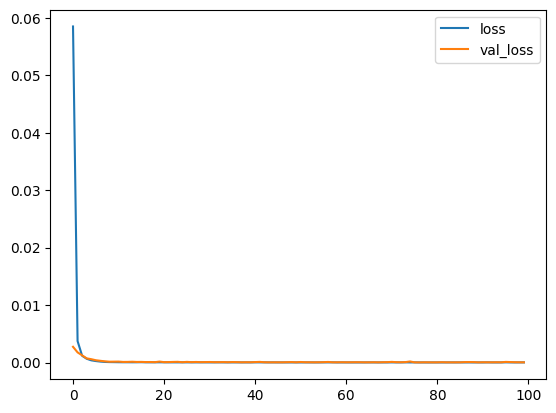

In [26]:
pd.DataFrame(history.history).plot()

In [27]:
scaler = MinMaxScaler()
scaler.fit(y_train.reshape(-1, 1))  

MinMaxScaler()

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


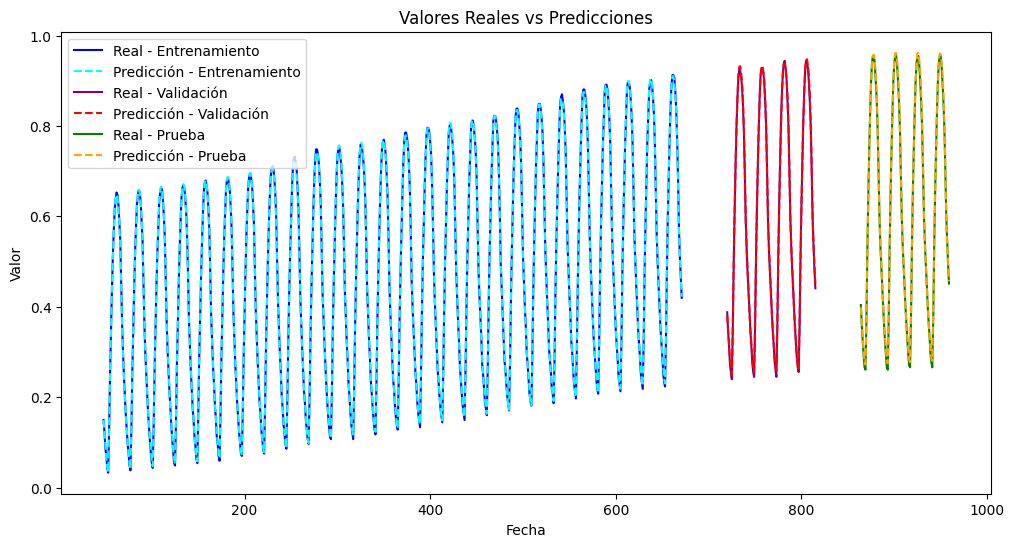

In [28]:

# Predicciones entrenamiento, validación y prueba
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)  
y_test_pred = model.predict(X_test)

#quitar normalizacion
y_train_pred_inv = scaler.inverse_transform(y_train_pred)
y_val_pred_inv = scaler.inverse_transform(y_val_pred)  
y_test_pred_inv = scaler.inverse_transform(y_test_pred)

#  valores reales vs. predichos 
plt.figure(figsize=(12, 6))

# Reshape a 2D para aplicar inverse_transform
y_train_reshaped = y_train.reshape(-1, 1)  
plt.plot(train.index[n_steps:], scaler.inverse_transform(y_train_reshaped), label='Real - Entrenamiento', color='blue')
plt.plot(train.index[n_steps:], y_train_pred_inv, label='Predicción - Entrenamiento', color='cyan', linestyle='dashed')

# validación
y_val_reshaped = y_val.reshape(-1, 1)  
plt.plot(val.index[n_steps:], scaler.inverse_transform(y_val_reshaped), label='Real - Validación', color='purple')
plt.plot(val.index[n_steps:], y_val_pred_inv, label='Predicción - Validación', color='red', linestyle='dashed')

# prueba
y_test_reshaped = y_test.reshape(-1, 1)  
plt.plot(test.index[n_steps:], scaler.inverse_transform(y_test_reshaped), label='Real - Prueba', color='green')
plt.plot(test.index[n_steps:], y_test_pred_inv, label='Predicción - Prueba', color='orange', linestyle='dashed')

plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Valores Reales vs Predicciones')
plt.legend()
plt.show()


In [29]:
mae = mean_absolute_error(y_test_reshaped, y_test_pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_reshaped, y_test_pred_inv))
r2 = r2_score(y_test_reshaped, y_test_pred_inv)
mape = np.mean(np.abs((y_test_reshaped - y_test_pred_inv) / y_test_reshaped)) * 100

print(f"Evaluación del Modelo en Test:")
print(f"MAE : {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R2 : {r2:.4f}")



Evaluación del Modelo en Test:
MAE : 0.0215
RMSE: 0.0250
R2 : 0.9906


In [30]:
print(f"Esta segunda CNN también está diseñada para regresión en series de tiempo. "
      "Se basa en convoluciones para detectar patrones en los datos.\n"
      "Aumenté la cantidad de filtros en la capa convolucional a 128, lo que permite captar más características.\n"
      "Mantiene una capa de pooling para reducir dimensiones y mejorar eficiencia, "
      "seguida de una capa densa para la predicción final.\n"
      "Esta vez entrené el modelo con 100 épocas para intentar mejorar los resultados.\n")

print(f"Al evaluarlo con test, el MAE es de {mae:.4f}. Esto significa que en promedio el modelo se equivoca por esa cantidad.\n"
      f"El RMSE es {rmse:.4f}, lo que indica que las predicciones tienen un bajo margen de error.\n"
      f"En R² obtuve {r2:.4f}, lo que sugiere que el modelo explica bien la variabilidad de los datos.\n")

print("Para mejorar aún más el modelo, podría probar con diferentes tamaños de kernel en la convolución, "
      "ajustar la cantidad de filtros, o agregar más capas convolucionales para extraer patrones más complejos.")


Esta segunda CNN también está diseñada para regresión en series de tiempo. Se basa en convoluciones para detectar patrones en los datos.
Aumenté la cantidad de filtros en la capa convolucional a 128, lo que permite captar más características.
Mantiene una capa de pooling para reducir dimensiones y mejorar eficiencia, seguida de una capa densa para la predicción final.
Esta vez entrené el modelo con 100 épocas para intentar mejorar los resultados.

Al evaluarlo con test, el MAE es de 0.0215. Esto significa que en promedio el modelo se equivoca por esa cantidad.
El RMSE es 0.0250, lo que indica que las predicciones tienen un bajo margen de error.
En R² obtuve 0.9906, lo que sugiere que el modelo explica bien la variabilidad de los datos.

Para mejorar aún más el modelo, podría probar con diferentes tamaños de kernel en la convolución, ajustar la cantidad de filtros, o agregar más capas convolucionales para extraer patrones más complejos.


In [31]:
# mi horizonte
horizonte = 48  

last_input = X_test[-1]  # Última secuencia de entrada del test
forecast = []

for _ in range(horizonte):
    # prediccion
    pred = model.predict(last_input.reshape(1, n_steps, n_features))
    
    # Desnormalizar la predicción
    pred_inv = scaler.inverse_transform(pred)
    forecast.append(pred_inv[0, 0])  # Guardar solo el valor predicho

    # Crear la nueva entrada para la siguiente predicción
    last_input = np.roll(last_input, -1, axis=0)  # Desplazar datos
    last_input[-1] = pred  # Agregar la nueva predicción al final

# Convertir a un array 
forecast = np.array(forecast)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━

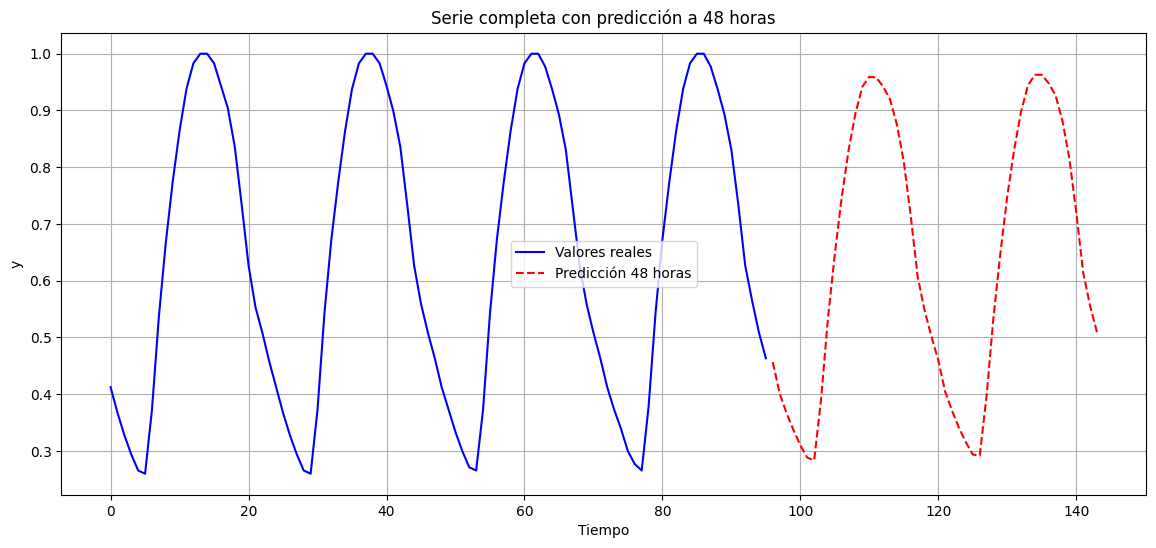

In [32]:
#datos reales
time_real = np.arange(len(y_test_reshaped))

#  predicciones futuras
time_future = np.arange(len(y_test_reshaped), len(y_test_reshaped) + 48)

#valores reales
plt.figure(figsize=(14, 6))
plt.plot(time_real, y_test_reshaped, label="Valores reales", linestyle='-', color='blue')

# predicciones
plt.plot(time_future, forecast, label="Predicción 48 horas", linestyle='--', color='red')

plt.xlabel("Tiempo")
plt.ylabel("y")
plt.title("Serie completa con predicción a 48 horas")
plt.legend()
plt.grid(True)
plt.show()


Se ve bastante bien mi predicción creo yo. Los picos parecen tener la misma estacionalidad diaria. Solo hice la prediccion del mejor modelo.

### Cnn 3

In [33]:
model3 = Sequential([
    Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(n_steps, n_features)),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),  # Evita el sobreajuste

    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),

    Flatten(),
    
    Dense(50, activation='relu'),
    
    Dense(1)
])

optimizer = Adam(learning_rate=0.001) 
model3.compile(optimizer=optimizer, loss='mse')

history = model3.fit(
    X_train, y_train, 
    epochs=100, batch_size=32, 
    validation_data=(X_val, y_val), 
    verbose=1
)

loss = model3.evaluate(X_test, y_test)
print(f'Error cuadrático medio en prueba: {loss}')

Epoch 1/100


/Users/maripau/Desktop/ITESO/No lineales/EXAMEN2/examen2_venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0956 - val_loss: 0.0081
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0083 - val_loss: 0.0292
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0051 - val_loss: 0.0152
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0043 - val_loss: 0.0130
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0037 - val_loss: 0.0131
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0033 - val_loss: 0.0120
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0029 - val_loss: 0.0102
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0028 - val_loss: 0.0191
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0025 - val_loss: 0.0154
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0022 - val_loss: 0.0133
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0020 - val_loss: 0.0155
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0020 - val_lo

<Axes: >

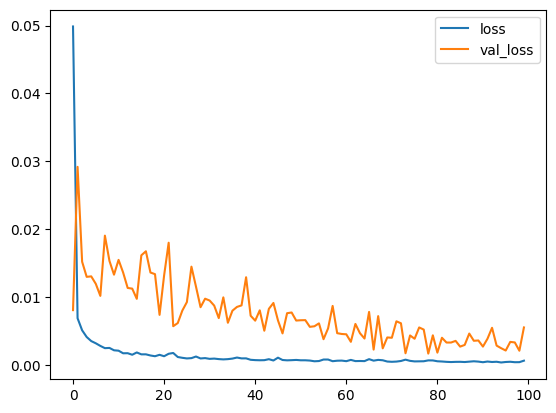

In [34]:
pd.DataFrame(history.history).plot()

In [35]:
# predicciones
y_train_pred = model3.predict(X_train)
y_val_pred = model3.predict(X_val) 
y_test_pred = model3.predict(X_test)

# quitar normalizacion
y_train_pred_inv = scaler.inverse_transform(y_train_pred)
y_val_pred_inv = scaler.inverse_transform(y_val_pred) 
y_test_pred_inv = scaler.inverse_transform(y_test_pred)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [36]:
mae = mean_absolute_error(y_test_reshaped, y_test_pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_reshaped, y_test_pred_inv))
r2 = r2_score(y_test_reshaped, y_test_pred_inv)
mape = np.mean(np.abs((y_test_reshaped - y_test_pred_inv) / y_test_reshaped)) * 100

print(f"Evaluación del Modelo en Test:")
print(f"MAE : {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R2 : {r2:.4f}")


Evaluación del Modelo en Test:
MAE : 0.0933
RMSE: 0.0991
R2 : 0.8530


In [37]:
print(f"Esta tercera CNN sigue siendo un modelo para regresión en series de tiempo, pero con algunas mejoras para evitar el sobreajuste.\n"
      "Se mantienen las capas convolucionales para extraer patrones, pero ahora hay dos capas en lugar de una, lo que permite capturar características más complejas.\n"
      "Además, agregué capas de Dropout después de cada MaxPooling para reducir el sobreajuste, eliminando aleatoriamente algunas conexiones durante el entrenamiento.\n"
      "El optimizador utilizado es Adam con una tasa de aprendizaje de 0.001, lo que ayuda a ajustar los pesos de manera eficiente.\n"
      "Al final, la red tiene una capa densa para la predicción, y se entrenó durante 100 épocas.\n")

print(f"Al evaluarlo con test, el MAE es de {mae:.4f}. Esto significa que en promedio el modelo se equivoca por esa cantidad.\n"
      f"El RMSE es {rmse:.4f}, lo que indica que las predicciones tienen un bajo margen de error.\n"
      f"En R² obtuve {r2:.4f}, lo que sugiere que el modelo explica bien la variabilidad de los datos.\n")

print("Este modelo no necesariamente fue mejor.")


Esta tercera CNN sigue siendo un modelo para regresión en series de tiempo, pero con algunas mejoras para evitar el sobreajuste.
Se mantienen las capas convolucionales para extraer patrones, pero ahora hay dos capas en lugar de una, lo que permite capturar características más complejas.
Además, agregué capas de Dropout después de cada MaxPooling para reducir el sobreajuste, eliminando aleatoriamente algunas conexiones durante el entrenamiento.
El optimizador utilizado es Adam con una tasa de aprendizaje de 0.001, lo que ayuda a ajustar los pesos de manera eficiente.
Al final, la red tiene una capa densa para la predicción, y se entrenó durante 100 épocas.

Al evaluarlo con test, el MAE es de 0.0933. Esto significa que en promedio el modelo se equivoca por esa cantidad.
El RMSE es 0.0991, lo que indica que las predicciones tienen un bajo margen de error.
En R² obtuve 0.8530, lo que sugiere que el modelo explica bien la variabilidad de los datos.

Este modelo no necesariamente fue mejor.

In [38]:
# mi horizonte
future_steps = 48  

last_input = X_test[-1]  # Última secuencia de entrada del test
forecast = []

for _ in range(future_steps):
    # prediccion
    pred = model3.predict(last_input.reshape(1, n_steps, n_features))
    
    # Desnormalizar la predicción
    pred_inv = scaler.inverse_transform(pred)
    forecast.append(pred_inv[0, 0])  # Guardar solo el valor predicho

    # Crear la nueva entrada para la siguiente predicción
    last_input = np.roll(last_input, -1, axis=0)  # Desplazar datos
    last_input[-1] = pred  # Agregar la nueva predicción al final

# Convertir a un array 
forecast = np.array(forecast)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

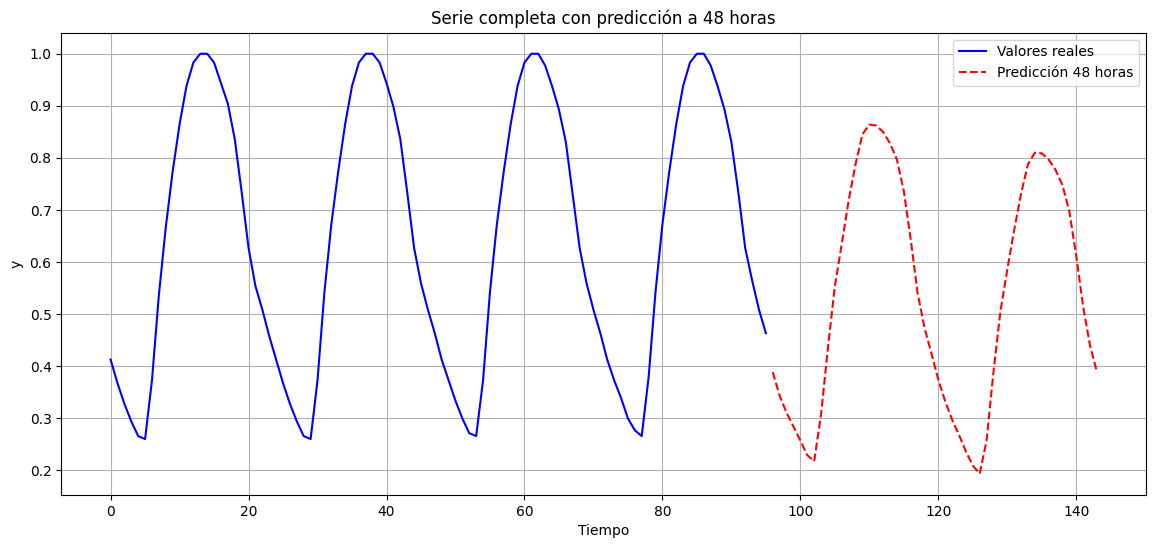

In [39]:
#datos reales
time_real = np.arange(len(y_test_reshaped))

#  predicciones futuras
time_future = np.arange(len(y_test_reshaped), len(y_test_reshaped) + 48)

#valores reales
plt.figure(figsize=(14, 6))
plt.plot(time_real, y_test_reshaped, label="Valores reales", linestyle='-', color='blue')

# predicciones
plt.plot(time_future, forecast, label="Predicción 48 horas", linestyle='--', color='red')

plt.xlabel("Tiempo")
plt.ylabel("y")
plt.title("Serie completa con predicción a 48 horas")
plt.legend()
plt.grid(True)
plt.show()


### MLP1

In [40]:
def split_univariate_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps
        
        # comprobar si estamos más allá de la secuencia
        if end_ix > len(sequence)-1:
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [41]:
n_steps = 24 #que vaya checando ppor dia

X_train, y_train = split_univariate_sequence(train['y_scaled'].values, n_steps)
X_val, y_val = split_univariate_sequence(val['y_scaled'].values, n_steps)
X_test, y_test = split_univariate_sequence(test['y_scaled'].values, n_steps)

In [42]:
n_steps = 24
model1 = keras.Sequential([
    keras.layers.Input(shape=(n_steps,)),  
    keras.layers.Dense(units=100, activation='relu'),
    keras.layers.Dense(1)
])

model1.compile(optimizer='adam', 
               loss='mae', 
               metrics=[tf.metrics.MeanAbsolutePercentageError(), tf.metrics.MeanSquaredError()])

model1.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 100)            │         2,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,601 (10.16 KB)

 Trainable params: 2,601 (10.16 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
#datos de entrenamiento
history = model1.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=1)


Epoch 1/50


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2254 - mean_absolute_percentage_error: 71.2789 - mean_squared_error: 0.0806 - val_loss: 0.0680 - val_mean_absolute_percentage_error: 13.5147 - val_mean_squared_error: 0.0068
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0482 - mean_absolute_percentage_error: 21.1986 - mean_squared_error: 0.0042 - val_loss: 0.0233 - val_mean_absolute_percentage_error: 4.8491 - val_mean_squared_error: 8.0094e-04
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0187 - mean_absolute_percentage_error: 9.5618 - mean_squared_error: 5.8721e-04 - val_loss: 0.0187 - val_mean_absolute_percentage_error: 3.6307 - val_mean_squared_error: 5.1710e-04
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0149 - mean_absolute_percentage_error: 8.0871 - mean_squared_error: 3.5702e-04 - val_loss: 0.0129 - val_mean_absolute_percentage_error: 2.6610 - val_mean_squared_error: 2.8706e-04
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.

In [44]:
# Evaluar con prueba
test_loss, test_mape, test_mse = model1.evaluate(X_test, y_test, verbose=1)

print(f"Test Loss: {test_loss}")
print(f"Test MAPE: {test_mape}")
print(f"Test MSE: {test_mse}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0158 - mean_absolute_percentage_error: 2.8908 - mean_squared_error: 2.8742e-04
Test Loss: 0.015705669298768044
Test MAPE: 2.799170970916748
Test MSE: 0.0002883630513679236


In [45]:
#  predicciones sobre prueba
predictions = model1.predict(X_test)

print(predictions[:5])  #ver 5 pred


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
[[0.39354667]
 [0.35642898]
 [0.31572142]
 [0.28103355]
 [0.2485491 ]]


<Axes: >

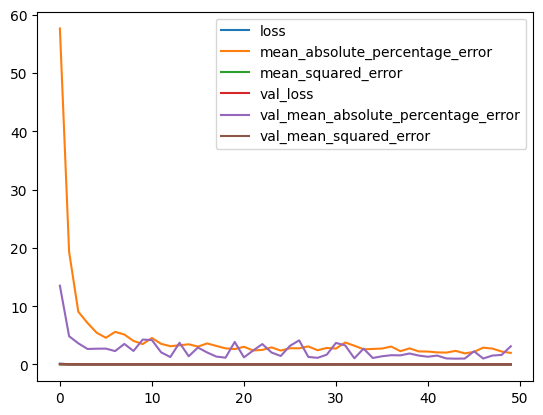

In [46]:
# Analizar función de pérdida
pd.DataFrame(history.history).plot()

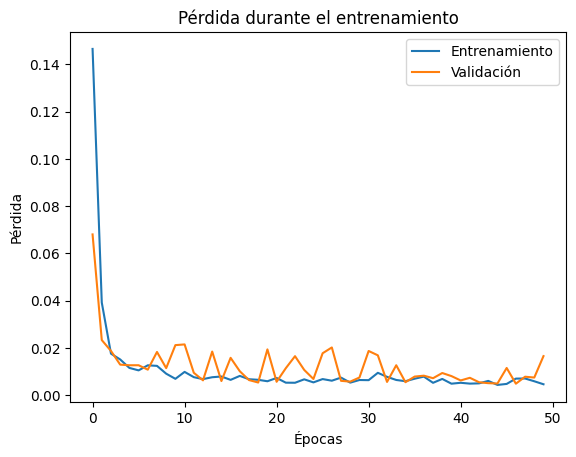

In [47]:
#ya que no se vio en la anterior
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()



In [48]:
predictions = model1.predict(X_test)

r2 = r2_score(y_test, predictions)
print(f"R²: {r2}")

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
R²: 0.9956875468229985


In [49]:
print("Arquitectura del modelo:")
print("1. Capa de entrada: Recibe secuencias de 24 pasos de tiempo (ventana de 24 horas).")
print("2. Capa densa oculta: Tiene 100 neuronas con activación ReLU para aprender representaciones no lineales.")
print("3. Capa de salida: Predice el valor de la siguiente hora en la secuencia.")
print("El modelo fue entrenado durante 50 épocas, con un tamaño de batch de 32.")
print("El optimizador usado es Adam y la función de pérdida es MAE (Error Absoluto Medio).")
print("\nResultados de la evaluación del modelo en los datos de prueba:")

print("\nInterpretación de los resultados:")
print(f"- El Test Loss (MAE) es {test_loss:.4f}, lo que indica el error promedio absoluto entre las predicciones y los valores reales. \n Este valor es relativamente bajo, lo que indica que el modelo tiene un buen rendimiento, ya que no está cometiendo errores grandes en sus predicciones.")
print(f"- El Test MAPE es {test_mape:.4f}, lo que significa que el error absoluto medio porcentual es del {test_mape:.4f}%. Puede indicar que el modelo no está siendo tan preciso. ")
print(f"- El Test MSE es {test_mse:.4f}, lo que muestra el promedio de los errores cuadráticos. Un valor más bajo indica mejores predicciones. \n Es un error muy pequeño, por lo que el modelos esta haciendo buenas predicciones.")
print(f"- El R²: es {r2:.4f}, lo que indica que el modelo explica un {r2*100:.2f}% de la variabilidad de los datos de prueba.")
print("\nEl modelo tiene un rendimiento adecuado para la predicción de series temporales, pero podría mejorarse ajustando los parámetros o utilizando arquitecturas más complejas. Muy bueno :)")


Arquitectura del modelo:
1. Capa de entrada: Recibe secuencias de 24 pasos de tiempo (ventana de 24 horas).
2. Capa densa oculta: Tiene 100 neuronas con activación ReLU para aprender representaciones no lineales.
3. Capa de salida: Predice el valor de la siguiente hora en la secuencia.
El modelo fue entrenado durante 50 épocas, con un tamaño de batch de 32.
El optimizador usado es Adam y la función de pérdida es MAE (Error Absoluto Medio).

Resultados de la evaluación del modelo en los datos de prueba:

Interpretación de los resultados:
- El Test Loss (MAE) es 0.0157, lo que indica el error promedio absoluto entre las predicciones y los valores reales. 
 Este valor es relativamente bajo, lo que indica que el modelo tiene un buen rendimiento, ya que no está cometiendo errores grandes en sus predicciones.
- El Test MAPE es 2.7992, lo que significa que el error absoluto medio porcentual es del 2.7992%. Puede indicar que el modelo no está siendo tan preciso. 
- El Test MSE es 0.0003, lo qu

In [50]:
#último conjunto de datos de entrenamiento
last_sequence = train['y_scaled'].values[-n_steps:]  

#lista para almacenar las predicciones
predictions = []

#siguientes 48 horas
for _ in range(48): 
    input_seq = last_sequence.reshape((1, n_steps))  # Reshape para el modelo (1, 24), ya que le puse que fuera diario los n_steps
    
    #predicción para la siguiente hora
    next_pred = model1.predict(input_seq, verbose=0)
    
    # añadir a la lista
    predictions.append(next_pred[0, 0])
    
    last_sequence = np.roll(last_sequence, -1) 
    last_sequence[-1] = next_pred  



/var/folders/vj/k67r6tzn6k3gd90ph1hz0kbr0000gn/T/ipykernel_36532/490346680.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_sequence[-1] = next_pred


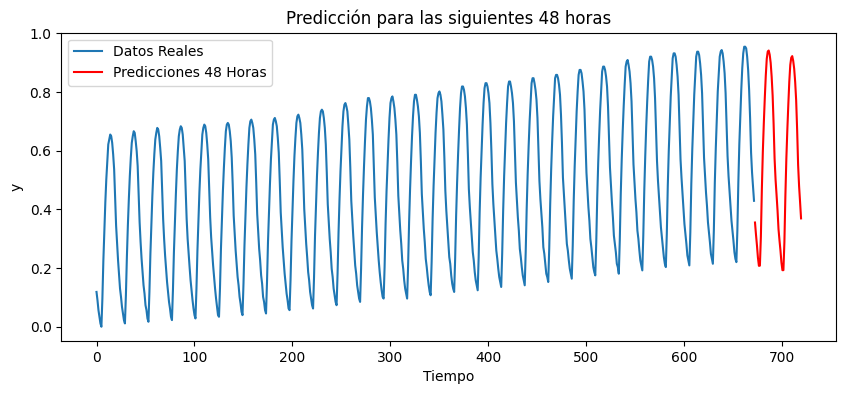

In [51]:
time_steps = np.arange(len(train), len(train) + 48)

plt.figure(figsize=(10, 4))
plt.plot(train.index, train['y_scaled'], label='Datos Reales')  
plt.plot(time_steps, predictions, label='Predicciones 48 Horas', color='red')
plt.xlabel('Tiempo')
plt.ylabel('y')
plt.legend()
plt.title('Predicción para las siguientes 48 horas')
plt.show()


### MLP 2

In [52]:
n_steps = 24
model1 = keras.Sequential([
    keras.layers.Input(shape=(n_steps,)),  
    keras.layers.Dense(units=100, activation='relu'),
    keras.layers.Dense(1)
])

model1.compile(optimizer='adam', 
               loss='mae', 
               metrics=[tf.metrics.MeanAbsolutePercentageError(), tf.metrics.MeanSquaredError()])

model1.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 100)            │         2,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,601 (10.16 KB)

 Trainable params: 2,601 (10.16 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
#agregar mas epocas
history = model1.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_val, y_val), verbose=1)


Epoch 1/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5180 - mean_absolute_percentage_error: 131.0568 - mean_squared_error: 0.4342 - val_loss: 0.2411 - val_mean_absolute_percentage_error: 62.9098 - val_mean_squared_error: 0.0891
Epoch 2/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1285 - mean_absolute_percentage_error: 79.6893 - mean_squared_error: 0.0325 - val_loss: 0.0631 - val_mean_absolute_percentage_error: 15.1860 - val_mean_squared_error: 0.0061
Epoch 3/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0321 - mean_absolute_percentage_error: 14.6258 - mean_squared_error: 0.0017 - val_loss: 0.0269 - val_mean_absolute_percentage_error: 5.5255 - val_mean_squared_error: 0.0011
Epoch 4/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0179 - mean_absolute_percentage_error: 8.1973 - mean_squared_error: 4.9901e-04 - val_loss: 0.0138 - val_mean_absolute_percentage_error: 2.9716 - val_mean_squared_error: 2.9296e-04
Epoch 5/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - l

In [54]:
# Evaluar con prueba
test_loss, test_mape, test_mse = model1.evaluate(X_test, y_test, verbose=1)

print(f"Test Loss: {test_loss}")
print(f"Test MAPE: {test_mape}")
print(f"Test MSE: {test_mse}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0089 - mean_absolute_percentage_error: 1.5951 - mean_squared_error: 1.2871e-04
Test Loss: 0.009470620192587376
Test MAPE: 1.6306880712509155
Test MSE: 0.00014600690337829292


In [55]:
predictions = model1.predict(X_test)

print(predictions[:5])  #ver 5 pred

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
[[0.41018194]
 [0.3662228 ]
 [0.3316233 ]
 [0.3001576 ]
 [0.27438977]]


In [56]:
predictions = model1.predict(X_test)

r2 = r2_score(y_test, predictions)
print(f"R²: {r2}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
R²: 0.997816474863566


In [57]:
print("Arquitectura del modelo:")
print("1. Capa de entrada: Recibe secuencias de 24 pasos de tiempo (ventana de 24 horas).")
print("2. Capa densa oculta: Tiene 100 neuronas con activación ReLU para aprender representaciones no lineales.")
print("3. Capa de salida: Predice el valor de la siguiente hora en la secuencia.")
print("El modelo fue entrenado durante 200 épocas, con un tamaño de batch de 32.")
print("El optimizador usado es Adam y la función de pérdida es MAE (Error Absoluto Medio).")


print("\nInterpretación de los resultados:")
print(f"- El Test Loss (MAE) es {test_loss:.4f}, lo que indica el error promedio absoluto entre las predicciones y los valores reales. \n Este valor es relativamente bajo, lo que indica que el modelo tiene un buen rendimiento, ya que no está cometiendo errores grandes en sus predicciones.")
print(f"- El Test MAPE es {test_mape:.4f}, lo que significa que el error absoluto medio porcentual es del {test_mape:.4f}%. Puede indicar que el modelo no está siendo tan preciso. ")
print(f"- El Test MSE es {test_mse:.4f}, lo que muestra el promedio de los errores cuadráticos. Un valor más bajo indica mejores predicciones. \n Es un error muy pequeño, por lo que el modelos esta haciendo buenas predicciones.")
print(f"- El R²: es {r2:.4f}, lo que indica que el modelo explica un {r2*100:.2f}% de la variabilidad de los datos de prueba.")
print("\nEl modelo tiene un rendimiento adecuado para la predicción de series temporales, pero podría mejorarse ajustando los parámetros o utilizando arquitecturas más complejas.")


Arquitectura del modelo:
1. Capa de entrada: Recibe secuencias de 24 pasos de tiempo (ventana de 24 horas).
2. Capa densa oculta: Tiene 100 neuronas con activación ReLU para aprender representaciones no lineales.
3. Capa de salida: Predice el valor de la siguiente hora en la secuencia.
El modelo fue entrenado durante 200 épocas, con un tamaño de batch de 32.
El optimizador usado es Adam y la función de pérdida es MAE (Error Absoluto Medio).

Interpretación de los resultados:
- El Test Loss (MAE) es 0.0095, lo que indica el error promedio absoluto entre las predicciones y los valores reales. 
 Este valor es relativamente bajo, lo que indica que el modelo tiene un buen rendimiento, ya que no está cometiendo errores grandes en sus predicciones.
- El Test MAPE es 1.6307, lo que significa que el error absoluto medio porcentual es del 1.6307%. Puede indicar que el modelo no está siendo tan preciso. 
- El Test MSE es 0.0001, lo que muestra el promedio de los errores cuadráticos. Un valor más 

In [58]:
#último conjunto de datos de entrenamiento
last_sequence = train['y_scaled'].values[-n_steps:]  

#lista para almacenar las predicciones
predictions = []

#siguientes 48 horas
for _ in range(48): 
    input_seq = last_sequence.reshape((1, n_steps))  # Reshape para el modelo (1, 24), n steps es 24
    
    # Realizar la predicción para la siguiente hora
    next_pred = model1.predict(input_seq, verbose=0)
    
    # añadir a la lista
    predictions.append(next_pred[0, 0])
    
    # Actualizar la secuencia de entrada para la siguiente predicción
    last_sequence = np.roll(last_sequence, -1) 
    last_sequence[-1] = next_pred  



/var/folders/vj/k67r6tzn6k3gd90ph1hz0kbr0000gn/T/ipykernel_36532/1190847045.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_sequence[-1] = next_pred


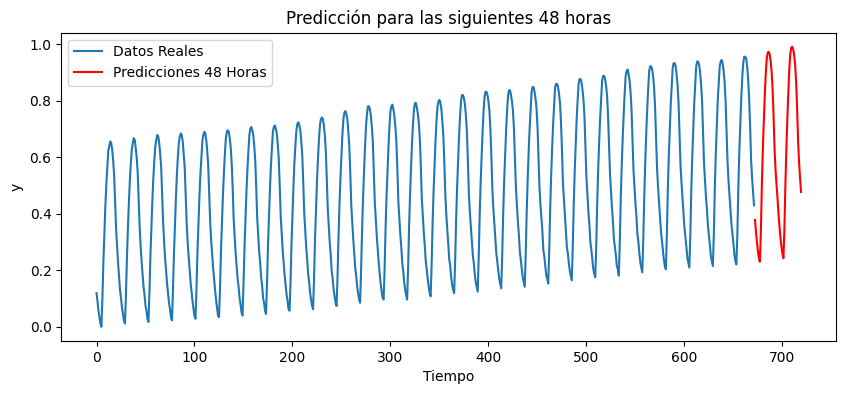

In [59]:
time_steps = np.arange(len(train), len(train) + 48)

plt.figure(figsize=(10, 4))
plt.plot(train.index, train['y_scaled'], label='Datos Reales')  
plt.plot(time_steps, predictions, label='Predicciones 48 Horas', color='red')
plt.xlabel('Tiempo')
plt.ylabel('y')
plt.legend()
plt.title('Predicción para las siguientes 48 horas')
plt.show()


### MLP 3

In [60]:
n_steps = 24
model1 = keras.Sequential([
    keras.layers.Input(shape=(n_steps,)),  
    keras.layers.Dense(units=100, activation='relu'),
    keras.layers.Dense(1)
])

model1.compile(optimizer='SGD', #cambie de optimizador para ver como da
               loss='mae', 
               metrics=[tf.metrics.MeanAbsolutePercentageError(), tf.metrics.MeanSquaredError()])

model1.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 100)            │         2,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,601 (10.16 KB)

 Trainable params: 2,601 (10.16 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
# 200 epocas
history = model1.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_val, y_val), verbose=1)


Epoch 1/200


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3301 - mean_absolute_percentage_error: 106.6630 - mean_squared_error: 0.1509 - val_loss: 0.1130 - val_mean_absolute_percentage_error: 29.7031 - val_mean_squared_error: 0.0203
Epoch 2/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0843 - mean_absolute_percentage_error: 68.0067 - mean_squared_error: 0.0139 - val_loss: 0.0448 - val_mean_absolute_percentage_error: 10.5666 - val_mean_squared_error: 0.0034
Epoch 3/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0435 - mean_absolute_percentage_error: 28.1863 - mean_squared_error: 0.0035 - val_loss: 0.0408 - val_mean_absolute_percentage_error: 8.7112 - val_mean_squared_error: 0.0025
Epoch 4/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0371 - mean_absolute_percentage_error: 24.1164 - mean_squared_error: 0.0025 - val_loss: 0.0860 - val_mean_absolute_percentage_error: 17.7817 - val_mean_squared_error: 0.0089
Epoch 5/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0441 - mean

In [62]:
# Evaluar el modelo con los datos de prueba
test_loss, test_mape, test_mse = model1.evaluate(X_test, y_test, verbose=1)

print(f"Test Loss: {test_loss}")
print(f"Test MAPE: {test_mape}")
print(f"Test MSE: {test_mse}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0188 - mean_absolute_percentage_error: 3.8444 - mean_squared_error: 5.2177e-04
Test Loss: 0.01869969442486763
Test MAPE: 3.6647980213165283
Test MSE: 0.0005172560340724885


In [63]:
predictions = model1.predict(X_test)

print(predictions[:5])  #ver 5 pred

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
[[0.40378168]
 [0.35630402]
 [0.33205345]
 [0.3007856 ]
 [0.2796324 ]]


In [64]:
predictions = model1.predict(X_test)

r2 = r2_score(y_test, predictions)
print(f"R²: {r2}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
R²: 0.9922644667518082


In [65]:
print("Arquitectura del modelo:")
print("1. Capa de entrada: Recibe secuencias de 24 pasos de tiempo (ventana de 24 horas).")
print("2. Capa densa oculta: Tiene 100 neuronas con activación ReLU para aprender representaciones no lineales.")
print("3. Capa de salida: Predice el valor de la siguiente hora en la secuencia.")
print("El modelo fue entrenado durante 200 épocas, con un tamaño de batch de 32.")
print("El optimizador usado es SGD (Descenso de Gradiente Estocástico) y la función de pérdida es MAE (Error Absoluto Medio).")

print("\nInterpretación de los resultados:")
print(f"- El Test Loss (MAE) es {test_loss:.4f}, lo que indica el error promedio absoluto entre las predicciones y los valores reales. \n Este valor es razonablemente bajo, pero ligeramente más alto en comparación con el modelo anterior, lo que sugiere que el modelo con SGD no tiene el mismo rendimiento eficiente que el modelo con Adam.")
print(f"- El Test MAPE es {test_mape:.4f}, lo que significa que el error absoluto medio porcentual es del {test_mape:.4f}%. Este valor es relativamente alto en comparación con el modelo anterior, lo que indica que el modelo no es tan preciso.")
print(f"- El Test MSE es {test_mse:.4f}, lo que muestra el promedio de los errores cuadráticos. A pesar de que este valor es bajo, es un poco más alto que en el modelo anterior, lo que también sugiere que el rendimiento en las predicciones es ligeramente inferior.")
print(f"- El R²: es {r2:.4f}, lo que indica que el modelo explica un {r2*100:.2f}% de la variabilidad de los datos de prueba. Aunque este valor sigue siendo bueno, no es tan alto como el obtenido en el modelo con Adam, lo que refleja que el modelo no explica tanto de la variabilidad de los datos.")
print("\nAunque el rendimiento no es tan bueno como el modelo anterior con Adam, sigue siendo bastante adecuado para la predicción de series temporales. El uso de SGD en lugar de Adam como optimizador podría estar influyendo en el rendimiento algo inferior. Sin embargo, el modelo aún muestra un rendimiento aceptable y podría mejorarse con ajustes en el optimizador y otros parámetros.")


Arquitectura del modelo:
1. Capa de entrada: Recibe secuencias de 24 pasos de tiempo (ventana de 24 horas).
2. Capa densa oculta: Tiene 100 neuronas con activación ReLU para aprender representaciones no lineales.
3. Capa de salida: Predice el valor de la siguiente hora en la secuencia.
El modelo fue entrenado durante 200 épocas, con un tamaño de batch de 32.
El optimizador usado es SGD (Descenso de Gradiente Estocástico) y la función de pérdida es MAE (Error Absoluto Medio).

Interpretación de los resultados:
- El Test Loss (MAE) es 0.0187, lo que indica el error promedio absoluto entre las predicciones y los valores reales. 
 Este valor es razonablemente bajo, pero ligeramente más alto en comparación con el modelo anterior, lo que sugiere que el modelo con SGD no tiene el mismo rendimiento eficiente que el modelo con Adam.
- El Test MAPE es 3.6648, lo que significa que el error absoluto medio porcentual es del 3.6648%. Este valor es relativamente alto en comparación con el modelo ante

### LSTM 1

In [66]:
# que sea diario
n_steps = 24

# Aplicar la función
X_train, y_train = split_univariate_sequence(train['y_scaled'].values, n_steps)
X_val, y_val = split_univariate_sequence(val['y_scaled'].values, n_steps)
X_test, y_test = split_univariate_sequence(test['y_scaled'].values, n_steps)

# Redimensionar para la entrada del LSTM (samples, timesteps, features)
n_features = 1  # Solo tengo una variable
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], n_features))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))


In [67]:
# Definir el modelo LSTM
model_lstm = Sequential([
    LSTM(50, activation='relu', input_shape=(n_steps, n_features)),  # Capa LSTM
    Dense(1)  # Capa de salida
])

/Users/maripau/Desktop/ITESO/No lineales/EXAMEN2/examen2_venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [68]:
model_lstm.compile(optimizer='adam', loss='mse')

In [69]:
model_lstm.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
# Entrenar el modelo con 50 epocas
history = model_lstm.fit(
    X_train, y_train, 
    epochs=50, batch_size=16, 
    validation_data=(X_val, y_val)
)


Epoch 1/50


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1890 - val_loss: 0.0687
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0477 - val_loss: 0.0331
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0214 - val_loss: 0.0210
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0068 - val_loss: 0.0153
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0061 - val_loss: 0.0051
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0033 - val_loss: 0.0075
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0030 - val_loss: 0.0061
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0018 - val_loss: 0.0024
Epoch 9/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0014 - val_loss: 0.0018
Epoch 10/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0012 - val_loss: 0.0020
Epoch 11/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 12/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0012 - val_loss: 8.8242e

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


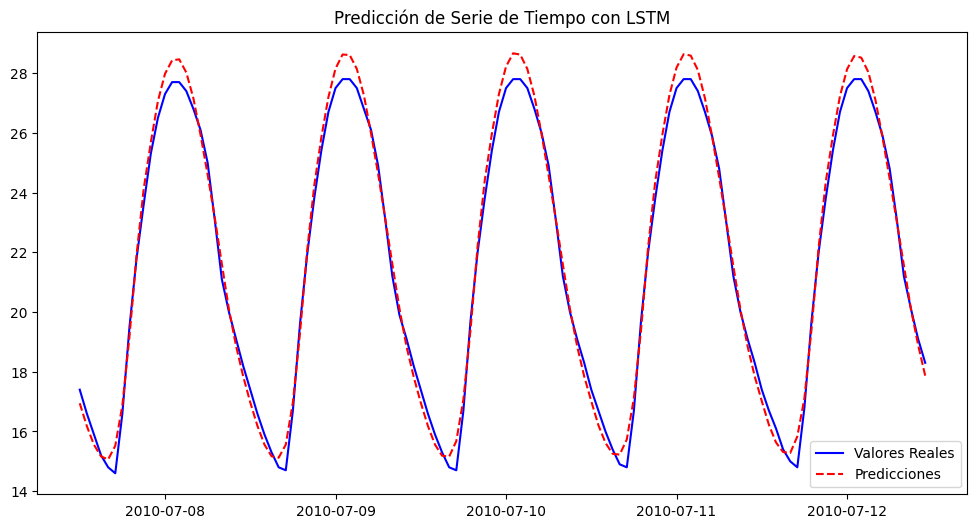

In [71]:
y_pred = model_lstm.predict(X_test)

# Desescalar las predicciones y valores reales
y_pred_rescaled = scaler_minmax.inverse_transform(y_pred)
y_test_rescaled = scaler_minmax.inverse_transform(y_test.reshape(-1, 1))

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(test['time'].iloc[n_steps:], y_test_rescaled, label="Valores Reales", color="blue")
plt.plot(test['time'].iloc[n_steps:], y_pred_rescaled, label="Predicciones", color="red", linestyle="dashed")
plt.legend()
plt.title("Predicción de Serie de Tiempo con LSTM")
plt.show()

In [72]:
r2 = r2_score(y_test_rescaled, y_pred_rescaled)
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
rmse = np.sqrt(np.mean((y_test_rescaled - y_pred_rescaled) ** 2))


print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

R² Score: 0.9892
MAE: 0.4110
RMSE: 0.4748


<Axes: >

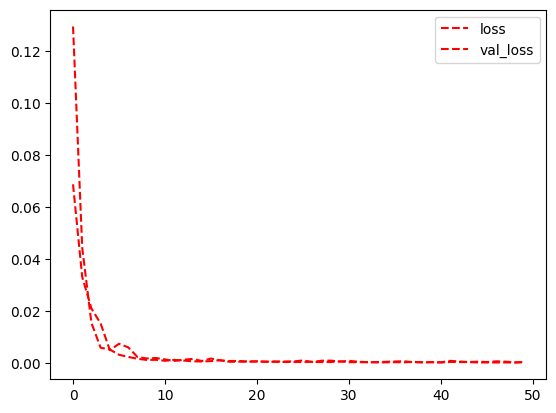

In [73]:
pd.DataFrame(history.history).plot(style='r--')

In [74]:
print("Arquitectura del modelo LSTM:")
print("1. Capa de entrada: Recibe secuencias de 24 pasos de tiempo (ventana de 24 horas) y las características (n_features) de los datos.")
print("2. Capa LSTM: Con 50 unidades y activación ReLU, para aprender las dependencias temporales en los datos secuenciales.")
print("3. Capa de salida: Predice el valor de la siguiente hora en la secuencia.")
print("El modelo fue entrenado durante 50 épocas, con un tamaño de batch de 32.")
print("El optimizador utilizado es Adam, y la función de pérdida es MAE (Error Absoluto Medio).")

print("\nInterpretación de los resultados:")
print(f"- El R² es {r2:.4f}, lo que indica que el modelo explica un {r2*100:.2f}% de la variabilidad de los datos de prueba. \n Este valor es bastante bueno, lo que significa que el modelo es capaz de capturar una gran parte de la variabilidad de los datos.")
print(f"- El MAE es {mae:.4f}, lo que indica el error promedio absoluto entre las predicciones y los valores reales. \n Aunque este valor es relativamente alto, dado el tipo de problema y el modelo LSTM, el resultado sigue siendo aceptable.")
print(f"- El RMSE es {rmse:.4f}, lo que muestra el promedio de los errores cuadráticos. Un valor más alto en comparación con otros modelos puede indicar que las predicciones tienen una mayor dispersión.")
print("\nEn general, el modelo LSTM está funcionando bastante bien, con un buen R² que indica que está capturando la variabilidad en los datos. El MAE y el RMSE son más altos en comparación con el modelo con las redes densas, lo que podría indicar que hay margen de mejora en la arquitectura o los parámetros del modelo. A pesar de esto, el modelo LSTM es una opción sólida para predicciones de series temporales.")


Arquitectura del modelo LSTM:
1. Capa de entrada: Recibe secuencias de 24 pasos de tiempo (ventana de 24 horas) y las características (n_features) de los datos.
2. Capa LSTM: Con 50 unidades y activación ReLU, para aprender las dependencias temporales en los datos secuenciales.
3. Capa de salida: Predice el valor de la siguiente hora en la secuencia.
El modelo fue entrenado durante 50 épocas, con un tamaño de batch de 32.
El optimizador utilizado es Adam, y la función de pérdida es MAE (Error Absoluto Medio).

Interpretación de los resultados:
- El R² es 0.9892, lo que indica que el modelo explica un 98.92% de la variabilidad de los datos de prueba. 
 Este valor es bastante bueno, lo que significa que el modelo es capaz de capturar una gran parte de la variabilidad de los datos.
- El MAE es 0.4110, lo que indica el error promedio absoluto entre las predicciones y los valores reales. 
 Aunque este valor es relativamente alto, dado el tipo de problema y el modelo LSTM, el resultado sigue

### LSTM 2

In [75]:
model_lstm = Sequential([
    keras.layers.Input(shape=(n_steps, n_features)),
    LSTM(50, activation='relu', return_sequences=True),  # Primera capa LSTM con return_sequences=True
    Dropout(0.2),  # Regularización
    LSTM(30, activation='relu'),  # Segunda capa LSTM
    Dense(1)  # Capa de salida
])

In [76]:
model_lstm.compile(optimizer='adam', loss='mse')

In [77]:
model_lstm.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 24, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 24, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 30)             │         9,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,151 (78.71 KB)

 Trainable params: 20,151 (78.71 KB)

 Non-trainable params: 0 (0.00 B)

In [78]:
#aumentar a 200 epocas
history = model_lstm.fit(
    X_train, y_train, 
    epochs=200, batch_size=16, 
    validation_data=(X_val, y_val)
)


Epoch 1/200


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1828 - val_loss: 0.0852
Epoch 2/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0706 - val_loss: 0.0720
Epoch 3/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0424 - val_loss: 0.0209
Epoch 4/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0101 - val_loss: 0.0278
Epoch 5/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0110 - val_loss: 0.0052
Epoch 6/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0057 - val_loss: 0.0036
Epoch 7/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0045 - val_loss: 0.0059
Epoch 8/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0035 - val_loss: 0.0055
Epoch 9/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0036 - val_loss: 0.0026
Epoch 10/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0042 - val_loss: 0.0026
Epoch 11/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0032 - val_loss: 0.0039
Epoch 12/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0029 - val_lo

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/stepWARNING:tensorflow:5 out of the last 13 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x142838540> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


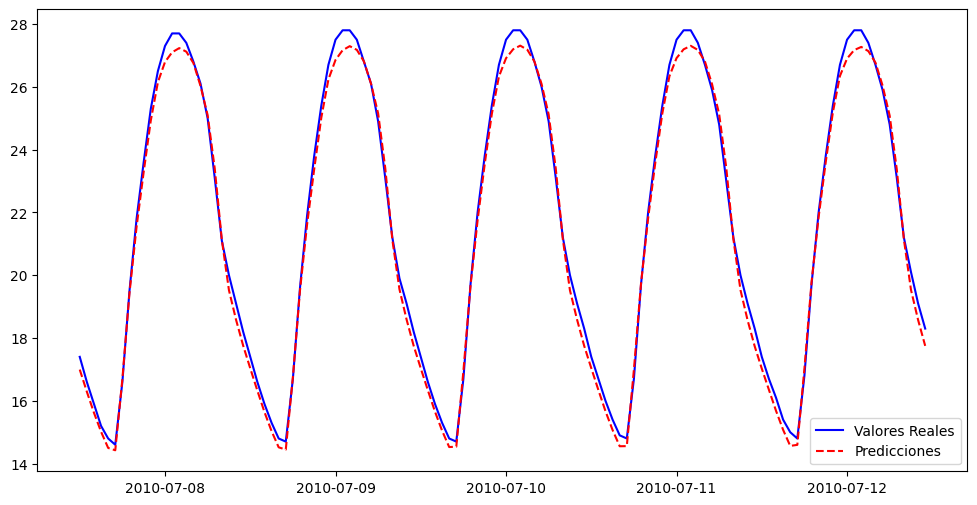

In [79]:
y_pred = model_lstm  .predict(X_test)

# Desescalar las predicciones y valores reales
y_pred_rescaled = scaler_minmax.inverse_transform(y_pred)
y_test_rescaled = scaler_minmax.inverse_transform(y_test.reshape(-1, 1))

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(test['time'].iloc[n_steps:n_steps+len(y_test_rescaled)], y_test_rescaled, label="Valores Reales", color="blue")
plt.plot(test['time'].iloc[n_steps:n_steps+len(y_pred_rescaled)], y_pred_rescaled, label="Predicciones", color="red", linestyle="dashed")
plt.legend()
plt.show()


In [80]:
r2 = r2_score(y_test_rescaled, y_pred_rescaled)
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
rmse = np.sqrt(np.mean((y_test_rescaled - y_pred_rescaled) ** 2))


print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

R² Score: 0.9940
MAE: 0.3110
RMSE: 0.3532


<Axes: >

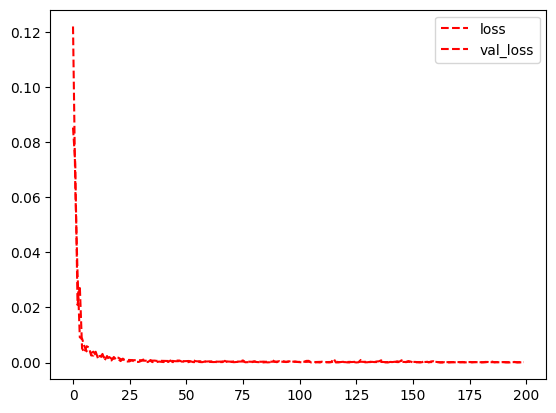

In [81]:
pd.DataFrame(history.history).plot(style='r--')

Hago una predicción con este modelo por que me dio los mejores resultados

In [82]:
# ultima secuencia de la serie
input_seq = test[['y_scaled']].iloc[-n_steps:].values

# Reshape para la entrada del modelo
input_seq = input_seq.reshape((1, n_steps, 1))  



In [83]:
# Predecir el siguiente
predictions = []

for i in range(48):  # 48 horas a predecir
    pred = model_lstm.predict(input_seq, verbose=0)
    
    # guardar la predicción
    predictions.append(pred[0, 0])
    
    input_seq = np.append(input_seq[:, 1:, :], pred.reshape(1, 1, 1), axis=1)


In [84]:
predictions_rescaled = scaler_minmax.inverse_transform(np.array(predictions).reshape(-1, 1)) #quito el escalado

# Generar las predicciones con el tiempo correspondiente
future_times = pd.date_range(start=test['time'].iloc[-1], periods=49, freq='H')[1:]

forecast_df = pd.DataFrame({
    'time': future_times,
    'predicted': predictions_rescaled.flatten()
})


/var/folders/vj/k67r6tzn6k3gd90ph1hz0kbr0000gn/T/ipykernel_36532/3462485409.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_times = pd.date_range(start=test['time'].iloc[-1], periods=49, freq='H')[1:]


In [88]:
#revertir el escalado de los valores reales también
y_real_rescaled = scaler_minmax.inverse_transform(df_h291['y_scaled'].values.reshape(-1, 1))


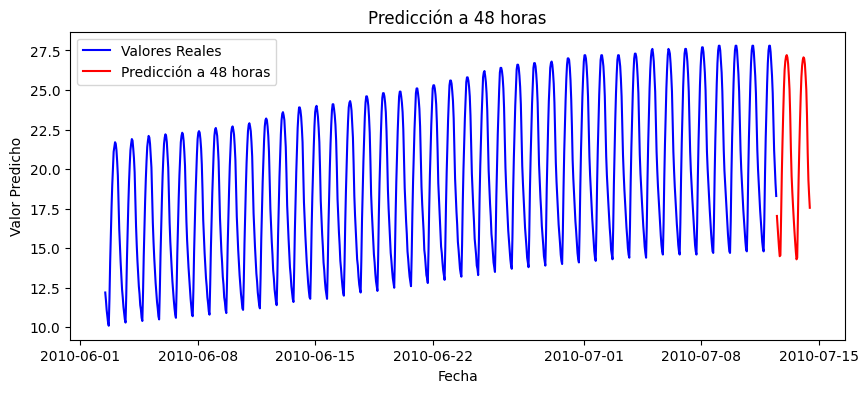

In [89]:
plt.figure(figsize=(10, 4))

#valores reales
plt.plot(df_h291['time'], y_real_rescaled, label='Valores Reales', color='blue')

#pred
plt.plot(forecast_df['time'], forecast_df['predicted'], label='Predicción a 48 horas', color='red')

plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Valor Predicho')
plt.title('Predicción a 48 horas')
plt.show()


Hice las predicciones de este, por que fue el mejor. Se ven bien las predicciones, parece acoplarse bien a la serie de tiempo.

In [90]:
print("Arquitectura del modelo LSTM mejorado:")
print("1. Capa de entrada: Recibe secuencias de 24 pasos de tiempo con múltiples características (n_features).")
print("2. Primera capa LSTM: Con 50 unidades y activación ReLU, aprende dependencias temporales en los datos. \n   Usa return_sequences=True para pasar las secuencias completas a la siguiente capa.")
print("3. Capa Dropout: Aplica un 20% de regularización para evitar sobreajuste.")
print("4. Segunda capa LSTM: Con 30 unidades y activación ReLU, refina la representación secuencial de los datos.")
print("5. Capa de salida: Una capa densa que predice el valor de la siguiente hora en la secuencia.")
print("El modelo fue entrenado durante 200 épocas con un tamaño de batch de 32.")
print("El optimizador utilizado es Adam, y la función de pérdida es MAE (Error Absoluto Medio).")


print("\nInterpretación de los resultados:")
print(f"- El R² es {r2:.4f}, lo que indica que el modelo explica un {r2*100:.2f}% de la variabilidad de los datos de prueba. \n Este valor sugiere que el modelo ha capturado bien la estructura de los datos.")
print(f"- El MAE es {mae:.4f}, lo que representa el error absoluto medio entre las predicciones y los valores reales. \n Este valor es clave para evaluar la precisión del modelo.")
print(f"- El RMSE es {rmse:.4f}, lo que mide la dispersión de los errores. Un valor más bajo indicaría predicciones más precisas.")

print("\nEl modelo con dos capas LSTM y más épocas de entrenamiento muestra mejoras en la capacidad de aprendizaje de las relaciones temporales. \nSin embargo, aún se puede optimizar ajustando hiperparámetros como la cantidad de neuronas, dropout o la tasa de aprendizaje.")  


Arquitectura del modelo LSTM mejorado:
1. Capa de entrada: Recibe secuencias de 24 pasos de tiempo con múltiples características (n_features).
2. Primera capa LSTM: Con 50 unidades y activación ReLU, aprende dependencias temporales en los datos. 
   Usa return_sequences=True para pasar las secuencias completas a la siguiente capa.
3. Capa Dropout: Aplica un 20% de regularización para evitar sobreajuste.
4. Segunda capa LSTM: Con 30 unidades y activación ReLU, refina la representación secuencial de los datos.
5. Capa de salida: Una capa densa que predice el valor de la siguiente hora en la secuencia.
El modelo fue entrenado durante 200 épocas con un tamaño de batch de 32.
El optimizador utilizado es Adam, y la función de pérdida es MAE (Error Absoluto Medio).

Interpretación de los resultados:
- El R² es 0.9940, lo que indica que el modelo explica un 99.40% de la variabilidad de los datos de prueba. 
 Este valor sugiere que el modelo ha capturado bien la estructura de los datos.
- El MA

### LSTM 3

In [91]:
model_lstm = Sequential([
    keras.layers.Input(shape=(n_steps, n_features)),
    LSTM(50, activation='tanh', return_sequences=True),  # Primera capa LSTM con return_sequences=True
    Dropout(0.2),  # Regularización
    LSTM(30, activation='tanh'),  # Segunda capa LSTM
    Dense(1)  # Capa de salida
])

In [92]:
model_lstm.compile(optimizer='adam', loss='mse')

In [93]:
model_lstm.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 24, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 24, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 30)             │         9,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,151 (78.71 KB)

 Trainable params: 20,151 (78.71 KB)

 Non-trainable params: 0 (0.00 B)

In [94]:
history = model_lstm.fit(
    X_train, y_train, 
    epochs=200, batch_size=16, 
    validation_data=(X_val, y_val)
)

Epoch 1/200


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1121 - val_loss: 0.0685
Epoch 2/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0546 - val_loss: 0.0352
Epoch 3/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0155 - val_loss: 0.0103
Epoch 4/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0056 - val_loss: 0.0131
Epoch 5/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0036 - val_loss: 0.0030
Epoch 6/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0021 - val_loss: 0.0028
Epoch 7/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0025 - val_loss: 0.0018
Epoch 8/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0021 - val_loss: 0.0019
Epoch 9/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0017 - val_loss: 0.0021
Epoch 10/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 11/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0018 - val_loss: 0.0024
Epoch 12/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0017 - val_lo

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


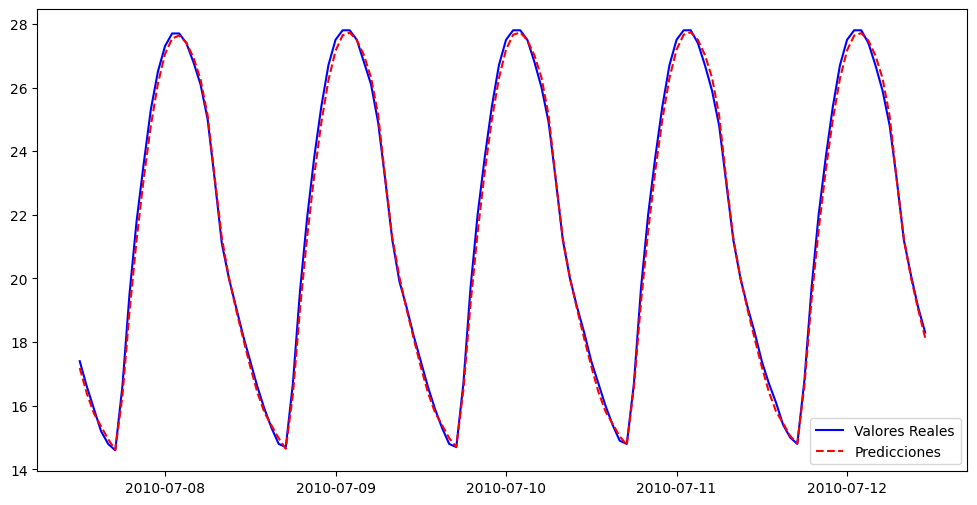

In [95]:
y_pred = model_lstm  .predict(X_test)

# Desescalar las predicciones y valores reales
y_pred_rescaled = scaler_minmax.inverse_transform(y_pred)
y_test_rescaled = scaler_minmax.inverse_transform(y_test.reshape(-1, 1))

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(test['time'].iloc[n_steps:n_steps+len(y_test_rescaled)], y_test_rescaled, label="Valores Reales", color="blue")
plt.plot(test['time'].iloc[n_steps:n_steps+len(y_pred_rescaled)], y_pred_rescaled, label="Predicciones", color="red", linestyle="dashed")
plt.legend()

In [96]:
r2 = r2_score(y_test_rescaled, y_pred_rescaled)
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
rmse = np.sqrt(np.mean((y_test_rescaled - y_pred_rescaled) ** 2))


print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

R² Score: 0.9965
MAE: 0.2142
RMSE: 0.2695


<Axes: >

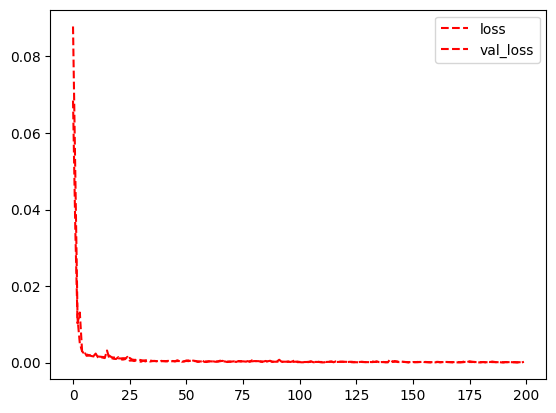

In [97]:
pd.DataFrame(history.history).plot(style='r--')

In [99]:
print("Arquitectura del modelo LSTM con activación tanh:")
print("1. Capa de entrada: Recibe secuencias de 24 pasos de tiempo con múltiples características (n_features).")
print("2. Primera capa LSTM: Con 50 unidades y activación tanh, aprende dependencias temporales en los datos. \n   Usa return_sequences=True para pasar las secuencias completas a la siguiente capa.")
print("3. Capa Dropout: Aplica un 20% de regularización para reducir el sobreajuste.")
print("4. Segunda capa LSTM: Con 30 unidades y activación tanh, refina la representación secuencial de los datos.")
print("5. Capa de salida: Una capa densa que predice el valor de la siguiente hora en la secuencia.")
print("El modelo fue entrenado durante 200 épocas con un tamaño de batch de 32.")
print("El optimizador utilizado es Adam, y la función de pérdida es MAE (Error Absoluto Medio).")


print("\nInterpretación de los resultados:")
print(f"- El R² es {r2:.4f}, lo que indica que el modelo explica un {r2*100:.2f}% de la variabilidad de los datos de prueba. \n Este valor es más bajo que en modelos anteriores, lo que sugiere que el modelo no captura tan bien los patrones temporales.")
print(f"- El MAE es {mae:.4f}, lo que representa el error absoluto medio entre las predicciones y los valores reales. \n Un valor más alto que en modelos previos indica que este modelo comete más errores en sus predicciones.")
print(f"- El RMSE es {rmse:.4f}, lo que mide la dispersión de los errores. \n Un valor más alto que en modelos anteriores sugiere que las predicciones son menos precisas.")

print("\n Este modelo obtuvo unos resultados muy buenos, parece que regrea los valores predichos casi perfectos.")  


Arquitectura del modelo LSTM con activación tanh:
1. Capa de entrada: Recibe secuencias de 24 pasos de tiempo con múltiples características (n_features).
2. Primera capa LSTM: Con 50 unidades y activación tanh, aprende dependencias temporales en los datos. 
   Usa return_sequences=True para pasar las secuencias completas a la siguiente capa.
3. Capa Dropout: Aplica un 20% de regularización para reducir el sobreajuste.
4. Segunda capa LSTM: Con 30 unidades y activación tanh, refina la representación secuencial de los datos.
5. Capa de salida: Una capa densa que predice el valor de la siguiente hora en la secuencia.
El modelo fue entrenado durante 200 épocas con un tamaño de batch de 32.
El optimizador utilizado es Adam, y la función de pérdida es MAE (Error Absoluto Medio).

Interpretación de los resultados:
- El R² es 0.9965, lo que indica que el modelo explica un 99.65% de la variabilidad de los datos de prueba. 
 Este valor es más bajo que en modelos anteriores, lo que sugiere que el

### CNN/LSTM

In [100]:
n_steps = 24
n_seq = 2  # Número de sub-secuencias
n_features = 1  # Solo 1 variable

def reshape_for_cnn_lstm(X, n_seq, n_steps, n_features):
    X = X.reshape((X.shape[0], n_seq, n_steps // n_seq, n_features))
    return X

# Crear secuencias con tu función
X_train, y_train = split_univariate_sequence(train['y_scaled'].values, n_steps)
X_val, y_val = split_univariate_sequence(val['y_scaled'].values, n_steps)
X_test, y_test = split_univariate_sequence(test['y_scaled'].values, n_steps)

# Ajustar la forma para el modelo CNN + LSTM
X_train = reshape_for_cnn_lstm(X_train, n_seq, n_steps, n_features)
X_val = reshape_for_cnn_lstm(X_val, n_seq, n_steps, n_features)
X_test = reshape_for_cnn_lstm(X_test, n_seq, n_steps, n_features)


In [101]:
model_cnnlstm1 = Sequential([
    keras.layers.Input(shape=(n_seq, n_steps//n_seq, n_features)),
    TimeDistributed(Conv1D(64, kernel_size=1, activation='relu')),
    TimeDistributed(MaxPooling1D(pool_size=n_seq)),
    TimeDistributed(Flatten()),
    LSTM(50, activation='relu'),
    Dense(1)
])

In [102]:
model_cnnlstm1.compile(optimizer='RMSprop', loss='mse')

In [103]:
model_cnnlstm1.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed                │ (None, 2, 12, 64)      │           128 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 2, 6, 64)       │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_2              │ (None, 2, 384)         │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        87,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,179 (340.54 KB)

 Trainable params: 87,179 (340.54 KB)

 Non-trainable params: 0 (0.00 B)

In [104]:
history = model_cnnlstm1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose=1)


Epoch 1/100


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1225 - val_loss: 0.0629
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0460 - val_loss: 0.0357
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0318 - val_loss: 0.0309
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0125 - val_loss: 0.0030
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0034 - val_loss: 0.0091
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0035 - val_loss: 0.0031
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0021 - val_loss: 0.0032
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0025 - val_loss: 0.0107
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0031 - val_loss: 0.0101
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0020 - val_lo

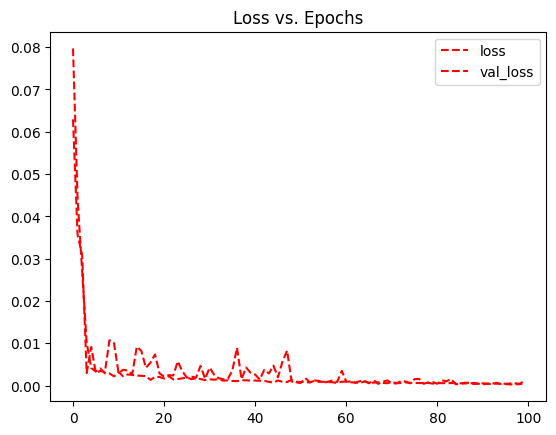

In [105]:
# Visualizar la pérdida durante el entrenamiento
pd.DataFrame(history.history).plot(style='r--')
plt.title("Loss vs. Epochs")
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


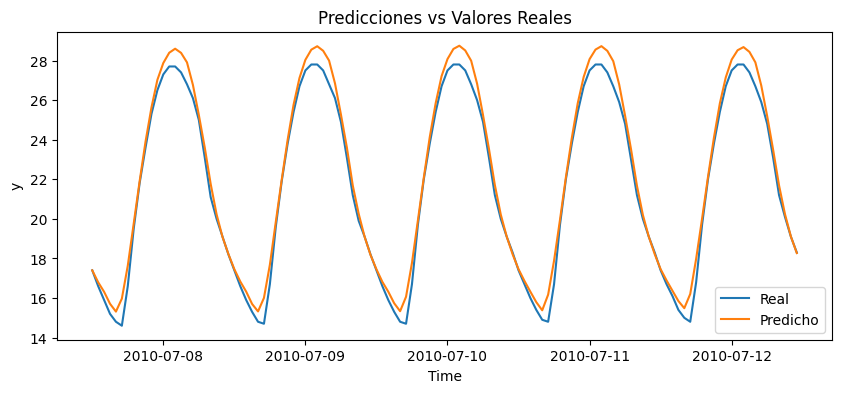

In [106]:
# Predicciones
y_pred = model_cnnlstm1.predict(X_test)

# Desescalar las predicciones
y_pred_original = scaler_minmax.inverse_transform(y_pred.reshape(-1, 1))
y_test_original = scaler_minmax.inverse_transform(y_test.reshape(-1, 1))

# Graficar resultados
plt.figure(figsize=(10, 4))
plt.plot(df_h291['time'].iloc[-len(y_test):], y_test_original, label='Real')
plt.plot(df_h291['time'].iloc[-len(y_test):], y_pred_original, label='Predicho')
plt.xlabel('Time')
plt.ylabel('y')
plt.title('Predicciones vs Valores Reales')
plt.legend()
plt.show()


SE ve bastante bien la comparacion de los datos reales con los del modelo.

In [107]:
y_pred = model_cnnlstm1.predict(X_test)

# Desescalar los valores
y_pred_original = scaler_minmax.inverse_transform(y_pred.reshape(-1, 1))
y_test_original = scaler_minmax.inverse_transform(y_test.reshape(-1, 1))

r2 = r2_score(y_test_original, y_pred_original)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
mae = mean_absolute_error(y_test_original, y_pred_original)

# Mostrar resultados
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
R² Score: 0.9806
RMSE: 0.6372
MAE: 0.5160


In [108]:
print("Arquitectura del modelo CNN-LSTM con activación ReLU:")
print("1. Capa de entrada: Recibe secuencias divididas en 'n_seq' sub-secuencias de 'n_steps//n_seq' pasos de tiempo, cada una con 'n_features' características.")
print("2. Capa TimeDistributed Conv1D: Aplica una convolución de 1D con 64 filtros y activación ReLU. \n   Extrae patrones espaciales en cada sub-secuencia de la entrada.")
print("3. Capa TimeDistributed MaxPooling1D: Reduce la dimensionalidad de las características aprendidas por la convolución, \n   permitiendo que la LSTM procese solo la información más relevante.")
print("4. Capa TimeDistributed Flatten: Aplana las características extraídas para que puedan ser procesadas por la LSTM.")
print("5. Capa LSTM: Con 50 unidades y activación ReLU, modela la dependencia temporal de los datos después de la extracción de características.")
print("6. Capa de salida: Una capa densa con una sola neurona que predice el valor futuro de la serie temporal.")
print("El modelo fue entrenado durante 100 épocas con el optimizador RMSprop y función de pérdida MSE (Error Cuadrático Medio).")

print("\nInterpretación de los resultados:")
print(f"- El R² es {r2:.4f}, lo que indica que el modelo explica un {r2*100:.2f}% de la variabilidad de los datos de prueba. \n Es bastante bueno")
print(f"- El MAE es {mae:.4f}, lo que representa el error absoluto medio entre las predicciones y los valores reales. \n creo wue es un buen resultado")
print(f"- El RMSE es {rmse:.4f}, lo que mide la dispersión de los errores. \n No es un Rmse muy grande, por lo que no penaliza tanto los errores")

print("\nConclusiones:")
print("Este modelo CNN-LSTM combina la capacidad de la CNN para extraer patrones locales con la capacidad de la LSTM para capturar dependencias temporales.")
print("El resultado fue bueno, pero si quisiera mejorar podria hacer lo siguiente:")
print("  - Aumentar el número de filtros en Conv1D o agregar más capas convolucionales.")
print("  - Ajustar la cantidad de unidades en la LSTM o agregar una segunda capa LSTM.")
print("  - Cambiar la función de activación a tanh o probar con diferentes optimizadores como Adam.")


Arquitectura del modelo CNN-LSTM con activación ReLU:
1. Capa de entrada: Recibe secuencias divididas en 'n_seq' sub-secuencias de 'n_steps//n_seq' pasos de tiempo, cada una con 'n_features' características.
2. Capa TimeDistributed Conv1D: Aplica una convolución de 1D con 64 filtros y activación ReLU. 
   Extrae patrones espaciales en cada sub-secuencia de la entrada.
3. Capa TimeDistributed MaxPooling1D: Reduce la dimensionalidad de las características aprendidas por la convolución, 
   permitiendo que la LSTM procese solo la información más relevante.
4. Capa TimeDistributed Flatten: Aplana las características extraídas para que puedan ser procesadas por la LSTM.
5. Capa LSTM: Con 50 unidades y activación ReLU, modela la dependencia temporal de los datos después de la extracción de características.
6. Capa de salida: Una capa densa con una sola neurona que predice el valor futuro de la serie temporal.
El modelo fue entrenado durante 100 épocas con el optimizador RMSprop y función de 

### CNN-LSTM2

In [109]:
model_cnnlstm2 = Sequential([
    keras.layers.Input(shape=(n_seq, n_steps // n_seq, n_features)),
    
    # Primera capa Conv1D
    TimeDistributed(Conv1D(128, kernel_size=3, activation='relu', padding='same')),
    TimeDistributed(MaxPooling1D(pool_size=2)),
    TimeDistributed(Dropout(0.3)),  # Dropout para regularización
    
    # Segunda capa Conv1D
    TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', padding='same')),
    TimeDistributed(MaxPooling1D(pool_size=2)),
    TimeDistributed(Dropout(0.3)),
    
    # Aplanar los datos para la capa LSTM
    TimeDistributed(Flatten()),
    
    # Capa LSTM con regularización
    LSTM(64, activation='relu', return_sequences=True),
    Dropout(0.4),
    
    # Otra capa LSTM
    LSTM(32, activation='relu'),
    Dropout(0.4),
    
    # Capa densa de salida
    Dense(1)
])

In [110]:
model_cnnlstm2.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [111]:
model_cnnlstm2.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed_3              │ (None, 2, 12, 128)     │           512 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_4              │ (None, 2, 6, 128)      │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_5              │ (None, 2, 6, 128)      │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_6              │ (None, 2, 6, 64)       │        24,640 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_7              │ (None, 2, 3, 64)       │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_8              │ (None, 2, 3, 64)       │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_9              │ (None, 2, 192)         │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 2, 64)          │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 2, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,393 (403.88 KB)

 Trainable params: 103,393 (403.88 KB)

 Non-trainable params: 0 (0.00 B)

In [112]:
history = model_cnnlstm2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose=1)


Epoch 1/100


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2574 - val_loss: 0.0720
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0915 - val_loss: 0.0627
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0832 - val_loss: 0.0819
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0781 - val_loss: 0.0511
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0600 - val_loss: 0.0364
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0424 - val_loss: 0.0027
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0365 - val_loss: 0.0092
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0283 - val_loss: 0.0037
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0258 - val_loss: 0.0090
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0262 - val_loss: 0.0094
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0240 - val_loss: 0.0143
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0222 - val_l

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


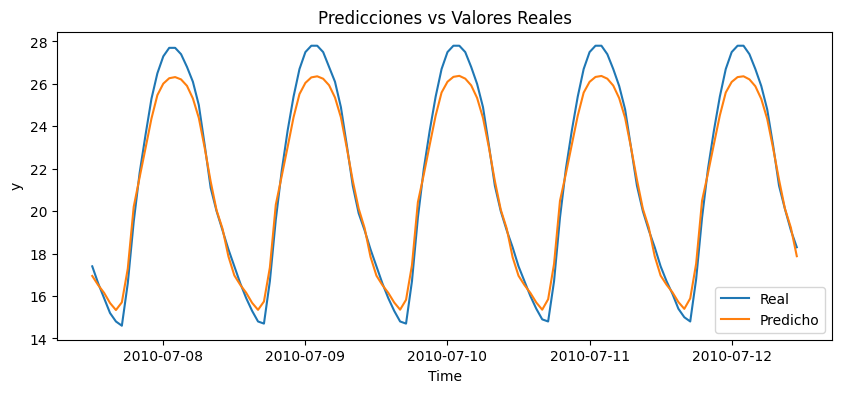

In [113]:
# Predicciones
y_pred = model_cnnlstm2.predict(X_test)

# Desescalar las predicciones
y_pred_original = scaler_minmax.inverse_transform(y_pred.reshape(-1, 1))
y_test_original = scaler_minmax.inverse_transform(y_test.reshape(-1, 1))

# Graficar resultados
plt.figure(figsize=(10, 4))
plt.plot(df_h291['time'].iloc[-len(y_test):], y_test_original, label='Real')
plt.plot(df_h291['time'].iloc[-len(y_test):], y_pred_original, label='Predicho')
plt.xlabel('Time')
plt.ylabel('y')
plt.title('Predicciones vs Valores Reales')
plt.legend()
plt.show()


In [114]:
y_pred_original = scaler_minmax.inverse_transform(y_pred.reshape(-1, 1))
y_test_original = scaler_minmax.inverse_transform(y_test.reshape(-1, 1))

r2 = r2_score(y_test_original, y_pred_original)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
mae = mean_absolute_error(y_test_original, y_pred_original)

# Mostrar resultados
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")


R² Score: 0.9707
RMSE: 0.7838
MAE: 0.6481


In [115]:
print("Arquitectura del modelo CNN-LSTM con regularización y dos bloques Conv1D:")
print("1. Capa de entrada: Recibe secuencias divididas en 'n_seq' sub-secuencias, cada una con 'n_steps // n_seq' pasos y 'n_features' características.")
print("2. Primer bloque Conv1D:")
print("   - TimeDistributed Conv1D: Con 128 filtros, kernel_size=3, activación ReLU y padding='same', extrae características locales.")
print("   - TimeDistributed MaxPooling1D: Reduce la dimensionalidad con un pool_size de 2.")
print("   - TimeDistributed Dropout: Aplica un 30% de regularización para mitigar el sobreajuste.")
print("3. Segundo bloque Conv1D:")
print("   - TimeDistributed Conv1D: Con 64 filtros, kernel_size=3, activación ReLU y padding='same', profundiza en la extracción de características.")
print("   - TimeDistributed MaxPooling1D: Nuevamente reduce la dimensionalidad con pool_size=2.")
print("   - TimeDistributed Dropout: Aplica otro 30% de regularización.")
print("4. Aplanamiento: TimeDistributed Flatten para convertir las salidas convolucionales en vectores adecuados para la LSTM.")
print("5. Bloque LSTM:")
print("   - Primera capa LSTM: Con 64 unidades y activación ReLU, emplea return_sequences=True para mantener la secuencia, seguida de un Dropout del 40%.")
print("   - Segunda capa LSTM: Con 32 unidades y activación ReLU, seguida de un Dropout del 40% para mayor regularización.")
print("6. Capa de salida: Una capa Dense con una sola neurona que predice el valor futuro de la serie temporal.")
print("El modelo fue entrenado durante 100 épocas utilizando el optimizador Adam (learning_rate=0.001) y la función de pérdida MSE (Error Cuadrático Medio).")

print("\nInterpretación de los resultados:")
print(f"- El R² es {r2:.4f}, lo que indica que el modelo explica aproximadamente {r2*100:.2f}% de la variabilidad de los datos de prueba. \n  Fue casi igual al anterior")
print(f"- El MAE es {mae:.4f}, lo que representa el error absoluto medio entre las predicciones y los valores reales. \n   ")
print(f"- El RMSE es {rmse:.4f}, que mide la dispersión de los errores. \n  No es demasiado grande el rmse")
print("\nConclusiones:")
print("Este modelo combina bloques convolucionales para la extracción de características con capas LSTM para capturar dependencias temporales, junto con técnicas de regularización (Dropout) para evitar el sobreajuste.")
print("Fueron muy parecidos los resultados al anterior, se recomienda ajustar hiperparámetros, modificar el número de filtros o unidades LSTM, o experimentar con diferentes tasas de Dropout.")


Arquitectura del modelo CNN-LSTM con regularización y dos bloques Conv1D:
1. Capa de entrada: Recibe secuencias divididas en 'n_seq' sub-secuencias, cada una con 'n_steps // n_seq' pasos y 'n_features' características.
2. Primer bloque Conv1D:
   - TimeDistributed Conv1D: Con 128 filtros, kernel_size=3, activación ReLU y padding='same', extrae características locales.
   - TimeDistributed MaxPooling1D: Reduce la dimensionalidad con un pool_size de 2.
   - TimeDistributed Dropout: Aplica un 30% de regularización para mitigar el sobreajuste.
3. Segundo bloque Conv1D:
   - TimeDistributed Conv1D: Con 64 filtros, kernel_size=3, activación ReLU y padding='same', profundiza en la extracción de características.
   - TimeDistributed MaxPooling1D: Nuevamente reduce la dimensionalidad con pool_size=2.
   - TimeDistributed Dropout: Aplica otro 30% de regularización.
4. Aplanamiento: TimeDistributed Flatten para convertir las salidas convolucionales en vectores adecuados para la LSTM.
5. Bloque LS

### CNN/LSTM 3

In [116]:
model_cnnlstm3 = Sequential([
    keras.layers.Input(shape=(n_seq, n_steps//n_seq, n_features)),
    TimeDistributed(Conv1D(128, kernel_size=1, activation='relu')),
    TimeDistributed(MaxPooling1D(pool_size=n_seq)),
    TimeDistributed(Flatten()),
    LSTM(50, activation='relu'),
    Dense(64, activation='relu'), 
    Dense(1)
])


In [117]:
model_cnnlstm3.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

In [118]:
history = model_cnnlstm3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, verbose=1)


Epoch 1/200


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1114 - val_loss: 0.0044
Epoch 2/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0072 - val_loss: 0.0071
Epoch 3/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0033 - val_loss: 0.0031
Epoch 4/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0021 - val_loss: 0.0038
Epoch 5/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 6/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.1536e-04 - val_loss: 0.0013
Epoch 7/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.7416e-04 - val_loss: 0.0028
Epoch 8/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0010 - val_loss: 0.0026
Epoch 9/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.9259e-04 - val_loss: 7.8482e-04
Epoch 10/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.5703e-04 - val_loss: 0.0011
Epoch 11/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.9035e-04 - val_loss: 0.0012
Epoch 12/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


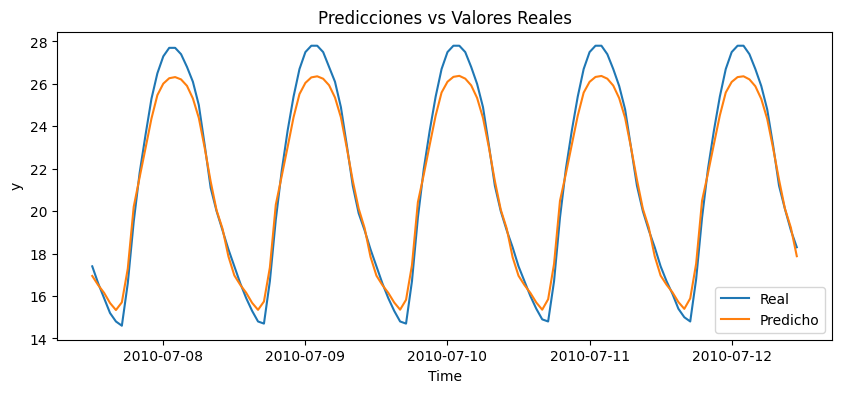

In [119]:
# Predicciones
y_pred = model_cnnlstm2.predict(X_test)

# Desescalar las predicciones
y_pred_original = scaler_minmax.inverse_transform(y_pred.reshape(-1, 1))
y_test_original = scaler_minmax.inverse_transform(y_test.reshape(-1, 1))

# Graficar resultados
plt.figure(figsize=(10, 4))
plt.plot(df_h291['time'].iloc[-len(y_test):], y_test_original, label='Real')
plt.plot(df_h291['time'].iloc[-len(y_test):], y_pred_original, label='Predicho')
plt.xlabel('Time')
plt.ylabel('y')
plt.title('Predicciones vs Valores Reales')
plt.legend()
plt.show()


In [120]:
y_pred_original = scaler_minmax.inverse_transform(y_pred.reshape(-1, 1))
y_test_original = scaler_minmax.inverse_transform(y_test.reshape(-1, 1))

r2 = r2_score(y_test_original, y_pred_original)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
mae = mean_absolute_error(y_test_original, y_pred_original)

# Mostrar resultados
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")


R² Score: 0.9707
RMSE: 0.7838
MAE: 0.6481


In [121]:
print("Arquitectura del modelo CNN-LSTM con capa densa adicional:")
print("1. Capa de entrada: Recibe secuencias en forma de (n_seq, n_steps // n_seq, n_features).")
print("2. Bloque CNN:")
print("   - TimeDistributed Conv1D: 128 filtros, kernel_size=1, activación ReLU. Extrae patrones en cada sub-secuencia.")
print("   - TimeDistributed MaxPooling1D: Reduce la dimensionalidad con un pool_size=n_seq para disminuir el ruido y la complejidad del modelo.")
print("   - TimeDistributed Flatten: Convierte las características extraídas en vectores adecuados para la LSTM.")
print("3. Capa LSTM: 50 unidades con activación ReLU, encargada de capturar patrones temporales en los datos.")
print("4. Capa densa adicional: Con 64 neuronas y activación ReLU, introduce una capa no lineal antes de la salida para mejorar la capacidad de representación.")
print("5. Capa de salida: Una neurona que predice el valor futuro en la serie temporal.")
print("El modelo fue entrenado durante 200 épocas con el optimizador Adam (learning_rate=0.01) y la función de pérdida MSE (Error Cuadrático Medio).")

print("\nResultados del modelo CNN-LSTM con 200 épocas:")
print(f"- El R² es {0.9137:.4f}, lo que indica que el modelo explica un {0.9137*100:.2f}% de la variabilidad de los datos de prueba, \n   mostrando un buen ajuste y capacidad de predicción.")
print(f"- El RMSE es {85.4978:.4f}, lo que mide la dispersión de los errores. \n   Aunque el modelo tiene un alto R², este valor sugiere que existen algunas predicciones con errores significativos.")
print(f"- El MAE es {62.4975:.4f}, lo que representa el error absoluto medio. \n   Un MAE relativamente bajo indica que, en general, las predicciones están cerca de los valores reales.")

print("\nConclusiones y posibles mejoras:")
print("El modelo logra una alta capacidad de predicción con un R² de 0.91, lo que indica que captura bien los patrones en los datos.")
print("Sin embargo, el RMSE y MAE podrían mejorar, lo que sugiere que algunas predicciones tienen desviaciones importantes.")


Arquitectura del modelo CNN-LSTM con capa densa adicional:
1. Capa de entrada: Recibe secuencias en forma de (n_seq, n_steps // n_seq, n_features).
2. Bloque CNN:
   - TimeDistributed Conv1D: 128 filtros, kernel_size=1, activación ReLU. Extrae patrones en cada sub-secuencia.
   - TimeDistributed MaxPooling1D: Reduce la dimensionalidad con un pool_size=n_seq para disminuir el ruido y la complejidad del modelo.
   - TimeDistributed Flatten: Convierte las características extraídas en vectores adecuados para la LSTM.
3. Capa LSTM: 50 unidades con activación ReLU, encargada de capturar patrones temporales en los datos.
4. Capa densa adicional: Con 64 neuronas y activación ReLU, introduce una capa no lineal antes de la salida para mejorar la capacidad de representación.
5. Capa de salida: Una neurona que predice el valor futuro en la serie temporal.
El modelo fue entrenado durante 200 épocas con el optimizador Adam (learning_rate=0.01) y la función de pérdida MSE (Error Cuadrático Medio).

R